# Applebee's Tweets, Sentiment, and Topic Modeling

"I have neither given nor recieved unauthorized aid on this academic work"



Jessica Davis, Xin Fang

## Business Context

This project focuses on Applebee's, a restaurant-chain that is based in the United States. Applebee's customers are fairly active on twitter, although some of their tweets are off-topic and not related to Applebee's or their food. Sentiment analysis reveals that both positive and negative tweets contain many off-topic keywords. Applebee's runs monthly food and drink promotions, which it often promotes on facebook. Applebee's does not often use their twitter account for promotions. Promotion keywords do show up fairly often in customers' tweets.

This project collected over 90,000 tweets from 9/23/2018-12/30/2018.

## Problem Statement

What is the average sentiment of on and off-topic tweets about Applebee's? What on/off topic keywords occur in negative and positive tweets?

## Significane of the Problem

Although overall sentiment variables can be helpful in many business contexts, specific sentiment analysis is only helpful to Applebee's if it is operationally relevant. Applebee's cannot influence sentiment on off-topic issues, but could influence sentiment on different service or promotion issues. Anlayzing sentiment on these topics could help guide future management decisions.

## Additional Issues Explored

This project also explores:
    * Topics of tweets during unusually high and low sentiment
    * Development of a on and off-topic classificaion model
    * Network Analysis of Applebee's Twitter Network

## Business Value

This project provides Applebee's insight into customer's sentiment towards different topics related to its restaurant. Many popular promotions during this period were included in the keywords. This will also allow them to understand how customers feel about promotions they ran during the collection period.

### Note:

We have already collected this data, but included code and a test dataset to demonstrate our ability to collect tweets.

# Data Collection

# Import packages

In [1]:
import csv
import pandas as pd
import re
import json
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import numpy as np

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import pyLDAvis.gensim
import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim import corpora, models, similarities

import numpy
from sklearn import preprocessing

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

from collections import Counter

# feature engineering (words to vectors)
from sklearn.feature_extraction.text import TfidfVectorizer

# classification algorithms (or classifiers)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# build a pipeline
from sklearn.pipeline import Pipeline

# model evaluation, validation
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#pip install scikit-plot 
import scikitplot as skplt

from patsy import dmatrices

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

pd.set_option('display.max_colwidth', -1)


%matplotlib inline
import nltk
import matplotlib.pyplot as plt
import csv
import pandas as pd
import sklearn
import numpy as np
from collections import Counter

# feature engineering (words to vectors)
from sklearn.feature_extraction.text import TfidfVectorizer

# classification algorithms (or classifiers)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# build a pipeline
from sklearn.pipeline import Pipeline

# model evaluation, validation
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#pip install scikit-plot 
import scikitplot as skplt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from patsy import dmatrices

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#pip install scikit-plot (optional)
import scikitplot as skplt

C:\Users\ajeda\Anaconda2\envs\py36\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\Users\ajeda\Anaconda2\envs\py36\lib\site-packages\scikitplot\plotters.py:37: DeprecationWarning: This module was deprecated in version 0.3.0 and its functions are spread throughout different modules. Please check the documentation and update your function calls as soon as possible. This module will be removed in 0.4.0
  DeprecationWarning)


# Import Data

In [2]:
# read your data as dataframe

df = pd.read_csv("data/applebees_20180922_20181231.csv")
df.head(1)

,created_at,id,texts,created_at_string,favorite_count,follower_count,following_count,geo_coordinates,hashtags,lang,profile_location,quote_count,retweet_count,screen_name,user_id,user_mentions
0,2018-11-23 06:50:01,1065860000973697029,@Applebees Yep I choose the dragon,2018-50-23T06:50:01.000Z,0,76,321,NaN,[],en,"{'country': 'United States', 'country_code': 'US', 'locality': 'Portland', 'region': 'Oregon', 'sub_region': 'Multnomah County', 'full_name': 'Portland, Oregon, United States', 'geo': {'coordinates': [-122.67621, 45.52345], 'type': 'point'}}",0,0,wampaholic,2596798002,"[{'screen_name': 'Applebees', 'name': ""Applebee's"", 'id': 74452613, 'id_str': '74452613', 'indices': [0, 10]}]"


# Descriptive Analysis

In [3]:
# update texts to lowercase
df['texts'] = df['texts'].str.lower()

In [4]:
#find out the number of characters in each tweet
df['texts'].str.len().head(2)

0    34 
1    126
Name: texts, dtype: int64

In [5]:
# what is the total number of characters in the tweets
df['texts'].str.len().sum() /len(df)

122.35182841891475

In [6]:
df['screen_name'].count()

94043

In [7]:
# extract mentions ... words starting with @ (these are mentions in Twitter)
df['mentions'] = df.texts.str.findall("(?<=@)\w+")

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-7-05f5b4254f24>:2: DeprecationWarning: invalid escape sequence \w
  df['mentions'] = df.texts.str.findall("(?<=@)\w+")


In [8]:
df['mentions']=df['mentions'].apply(', '.join)

In [9]:
df['cleaned'] = df['texts']
df['cleaned']=df['cleaned'].str.replace(r'(@\w+)', ' ')
df['cleaned'] = df['cleaned'].str.replace('http\S+|www.\S+', '')
df['cleaned']=df.cleaned.str.replace('[^a-zA-Z]', ' ')
df['cleaned']=df.cleaned.str.findall('\w{4,}').str.join(' ')
df['cleaned']=df.cleaned.str.replace('\d+', '')

<>:3: DeprecationWarning: invalid escape sequence \S
<>:5: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \d
<>:3: DeprecationWarning: invalid escape sequence \S
<>:5: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \d
<>:3: DeprecationWarning: invalid escape sequence \S
<>:5: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \d
<ipython-input-9-d794cd1e3a5b>:3: DeprecationWarning: invalid escape sequence \S
  df['cleaned'] = df['cleaned'].str.replace('http\S+|www.\S+', '')
<ipython-input-9-d794cd1e3a5b>:5: DeprecationWarning: invalid escape sequence \w
  df['cleaned']=df.cleaned.str.findall('\w{4,}').str.join(' ')
<ipython-input-9-d794cd1e3a5b>:6: DeprecationWarning: invalid escape sequence \d
  df['cleaned']=df.cleaned.str.replace('\d+', '')


In [10]:
df['retweet'] = df.texts.str.startswith("rt")

In [11]:
#change the pos tweet column to dummy variables
df_dummies = pd.get_dummies(df['retweet'], prefix='retweet')
df = df.join(df_dummies)

In [12]:
df.drop(['retweet_False','retweet'], axis=1, inplace=True)

In [13]:
df.rename(columns={'retweet_True':'retweet'}, inplace=True)

In [14]:
df['hashtags'] = df.texts.str.findall(r"(?<=#)\w+")

In [15]:
df['hashtags']=df['hashtags'].apply(' '.join)

Text(0.5, 0, 'user')

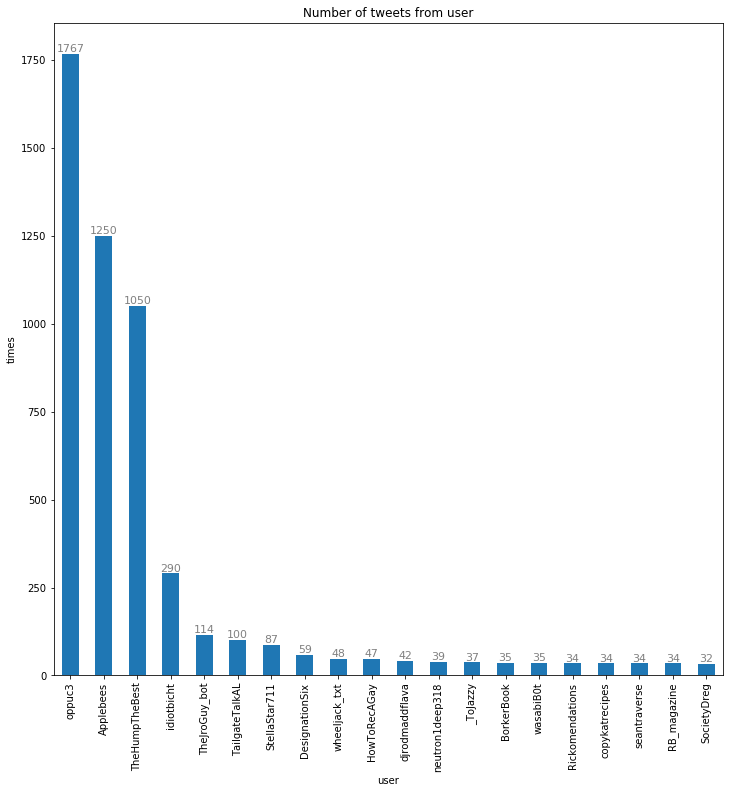

In [16]:
fig, ax = plt.subplots(figsize=(12,12))
df['screen_name'].value_counts().head(20).plot(kind='bar')
for p in ax.patches:
             ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
ax.set_title('Number of tweets from user')
plt.ylabel('times')
plt.xlabel('user')

### Most users do not tweet about Applebee's often.

In [17]:
df_hashtag = df

In [18]:
df_hashtag['hashtags'].replace('', np.nan, inplace=True)

In [19]:
df_hashtag.dropna(subset=['hashtags'], inplace=True)

Text(0.5, 0, 'hashtags')

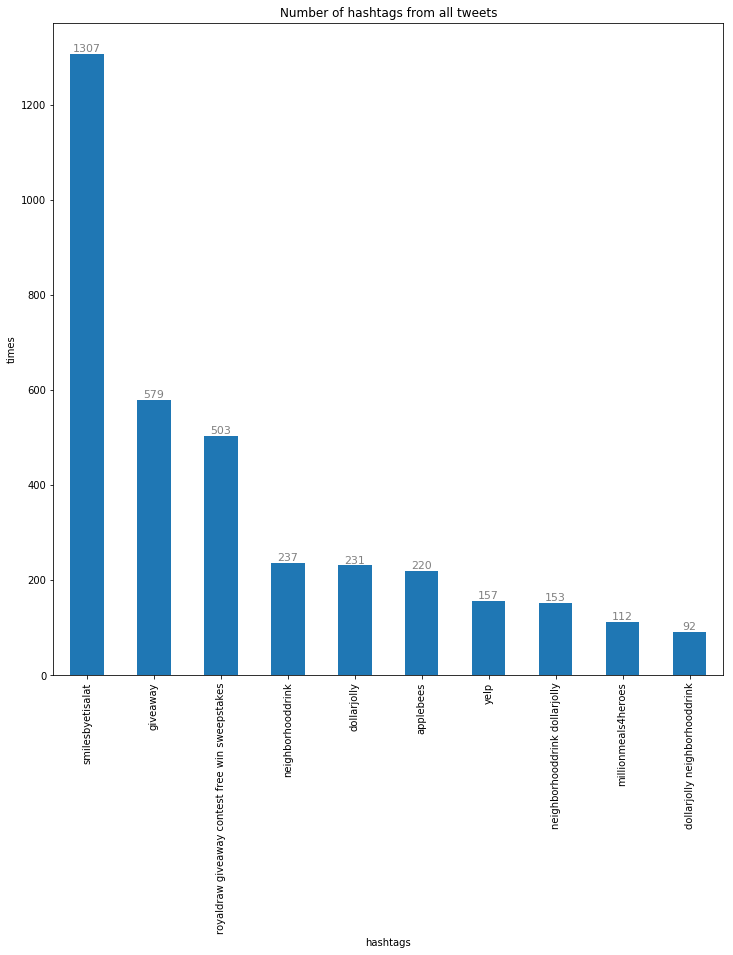

In [20]:
fig, ax = plt.subplots(figsize=(12,12))
df_hashtag['hashtags'].value_counts().head(10).plot(kind='bar')
for p in ax.patches:
             ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
ax.set_title('Number of hashtags from all tweets')
plt.ylabel('times')
plt.xlabel('hashtags')

### Popular Hashtags:
* Smiles by Etisalat is a promotional company based in the UAE. They have a lot of tweets referencing gift cards and giveaways referencing applebee's. Most of their tweets can be classified as "off-topic".
* Royal draw is another promotional account that raffles for giftcards. They have a loyal rewards membership that has many partners including applebee's.
* neighboorhooddrink is a hashtag referring to applebee's drink promotions
* dollarjolly is one of applebee's dirnk of the month promotions, run in december

In [21]:
df_mentions = df

In [22]:
df_mentions['mentions'].replace('', np.nan, inplace=True)

In [23]:
df_mentions.dropna(subset=['mentions'], inplace=True)

Text(0.5, 0, 'mentions')

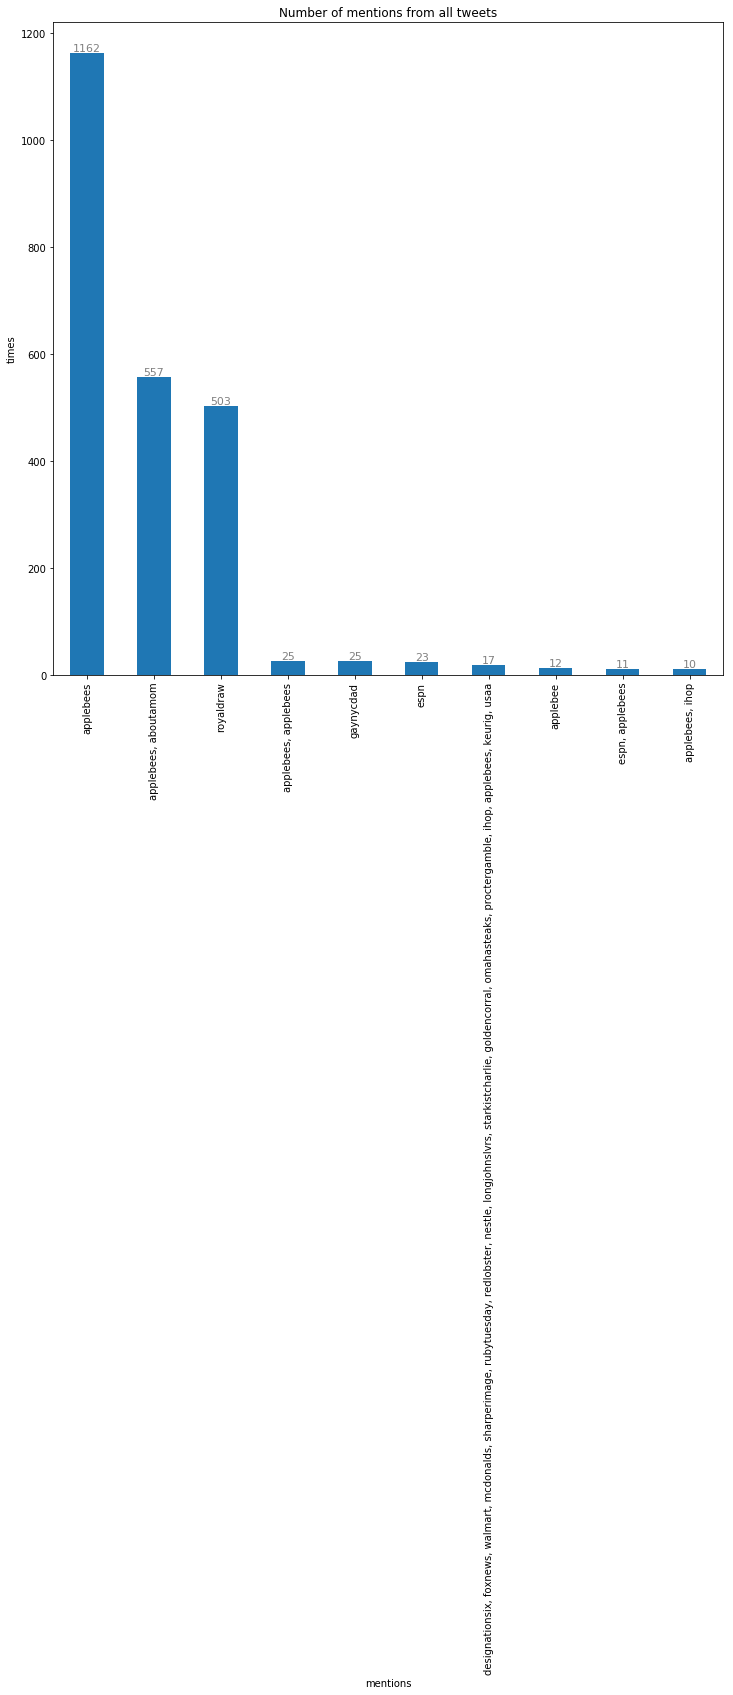

In [24]:
fig, ax = plt.subplots(figsize=(12,12))
df_mentions['mentions'].value_counts().head(10).plot(kind='bar')
for p in ax.patches:
             ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
ax.set_title('Number of mentions from all tweets')
plt.ylabel('times')
plt.xlabel('mentions')

### Popular mentions:
* Applebee's aboutamom: This refers to a blog post by a blogger "About a Mom" that ran a sponsored post about Applebee's Neighborhood pasta campaign. She ran a raffle where users could mention her blog and applebees in a tweet for a chance to win an applebee's gift card.
* The blog Gay NYC Dad ran a similar giveaway linked to their twitter account
* The fourth to last tweet in the graph lists companies that sponsored fox news at the time. This was a popular topic at the time becayse consumers were boycotting these companies.


In [25]:
df['on_topic']=df.texts.str.contains('food|restaurant|drink|dollar|zombie|dollarzombie|jolly|wings|fries|pastas|pasta|bar|drink|drunk|neighborhood|customer|buffallo|eat|cherry|flavor|cocktail|rib|cow|month|promotion|pancake|support|troops|veterans|veteran|sweetest|sweet|veteransday|meal|breakfast|badservice|service|waitress|waiter|bartender|candy|shrimp|vodka|new|cheese|chop|holy|holly|delicious', regex=True)

In [26]:
#change the pos tweet column to dummy variables
df_dummies = pd.get_dummies(df['on_topic'], prefix='on_topic')
df = df.join(df_dummies)

In [27]:
#drop unnecessary columns
df.drop(['on_topic', 'on_topic_False'], axis=1, inplace=True)

In [28]:
df.rename(columns={'on_topic_True':'on_topic'}, inplace=True)

In [29]:
df_topic = df[['texts','on_topic']]

In [30]:
df_topic.to_csv('data/topic.csv',header= None, index=False)

# Sentiment Analysis

In [31]:
vs = SentimentIntensityAnalyzer()

In [32]:
def sen_score(x):
    return vs.polarity_scores(x)['compound']

In [33]:
df['sentiment'] = df['texts'].apply(lambda x: vs.polarity_scores(x)['compound'])
df.head(1)

,created_at,id,texts,created_at_string,favorite_count,follower_count,following_count,geo_coordinates,hashtags,lang,...,quote_count,retweet_count,screen_name,user_id,user_mentions,mentions,cleaned,retweet,on_topic,sentiment
68,2018-11-23 14:11:39,1065971140072538112,"@brycetreggs nobody says you have to have turkey and mashed potatoes! do it your way. if the guests are disappointed, applebee's is open! #gobblegobble",2018-11-23T14:11:39.000Z,0,116,452,NaN,gobblegobble,en,...,0,0,geo1de,133879900,"[{'screen_name': 'BryceTreggs', 'name': 'Trigga', 'id': 322362841, 'id_str': '322362841', 'indices': [0, 12]}]",brycetreggs,nobody says have have turkey mashed potatoes your guests disappointed applebee open gobblegobble,0,0,-0.5696


In [34]:
df['sentiment'] = df['sentiment'].astype(str)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

In [35]:
df['pos']= df['sentiment'] > .3

In [36]:
df['neg']= df['sentiment'] < 0

In [37]:
df['neu']= ((df['sentiment'] >= 0) & (df['sentiment']< .3))

In [38]:
#change the pos tweet column to dummy variables
df_dummies = pd.get_dummies(df['pos'], prefix='pos')
df = df.join(df_dummies)

In [39]:
#change the pos tweet column to dummy variables
df_dummies = pd.get_dummies(df['neg'], prefix='neg')
df = df.join(df_dummies)

In [40]:
#change the pos tweet column to dummy variables
df_dummies = pd.get_dummies(df['neu'], prefix='neu')
df = df.join(df_dummies)

In [41]:
#drop unnecessary columns
df.drop(['neg', 'pos','neu','neg_False','neu_False','pos_False'], axis=1, inplace=True)

In [42]:
df.rename(columns={'pos_True':'pos','neg_True':'neg','neu_True':'neu'}, inplace=True)

In [43]:
# number of positive tweets
df['pos'].sum()

2805

In [44]:
# number of neutural tweets
df['neu'].sum()

1128

In [45]:
# number of negative tweets
df['neg'].sum()

746

In [46]:
df= df.set_index(['created_at'])

In [47]:
df.index

Index(['2018-11-23 14:11:39', '2018-11-23 15:53:55', '2018-11-23 17:08:20',
       '2018-11-23 17:38:22', '2018-11-23 18:04:18', '2018-11-23 18:04:54',
       '2018-11-23 18:15:57', '2018-11-23 18:22:38', '2018-11-23 19:19:56',
       '2018-11-23 20:16:40',
       ...
       '2018-11-23 18:04:18', '2018-11-23 17:38:22', '2018-11-23 17:08:20',
       '2018-11-23 15:26:32', '2018-11-23 14:11:39', '2018-11-23 12:07:38',
       '2018-11-23 06:04:08', '2018-11-23 03:01:46', '2018-11-23 01:59:51',
       '2018-11-23 00:38:16'],
      dtype='object', name='created_at', length=4679)

In [48]:
df.index = pd.to_datetime(df.index)
df.head(1)

,id,texts,created_at_string,favorite_count,follower_count,following_count,geo_coordinates,hashtags,lang,profile_location,...,user_id,user_mentions,mentions,cleaned,retweet,on_topic,sentiment,pos,neg,neu
created_at,,,,,,,,,,,,,,,,,,,,,
2018-11-23 14:11:39,1065971140072538112,"@brycetreggs nobody says you have to have turkey and mashed potatoes! do it your way. if the guests are disappointed, applebee's is open! #gobblegobble",2018-11-23T14:11:39.000Z,0,116,452,NaN,gobblegobble,en,"{'country': 'United States', 'country_code': 'US', 'region': 'Delaware', 'full_name': 'Delaware, United States', 'geo': {'coordinates': [-75.49992, 39.00039], 'type': 'point'}}",...,133879900,"[{'screen_name': 'BryceTreggs', 'name': 'Trigga', 'id': 322362841, 'id_str': '322362841', 'indices': [0, 12]}]",brycetreggs,nobody says have have turkey mashed potatoes your guests disappointed applebee open gobblegobble,0,0,-0.5696,0,1,0


C:\Users\ajeda\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sentiment()
  


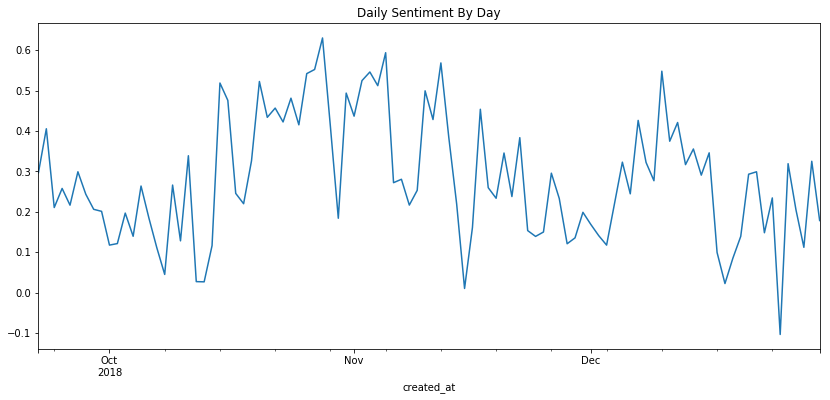

In [49]:
plt.figure(figsize=[14,6])
df.resample('D','sentiment').mean().plot(title='Daily Sentiment By Day')

### Sentiment peaked from mid-October to mid-November, and again at the beginning of December.

In [50]:
def f(x):
     return pd.Series(dict(daily_sent = x['sentiment'].mean(), 
                        ))

In [51]:
daily_sent = df.groupby(df.index.date).apply(f)
print(len(daily_sent))
daily_sent.head()

100


,daily_sent
2018-09-22,0.297228
2018-09-23,0.405554
2018-09-24,0.210931
2018-09-25,0.258103
2018-09-26,0.216760


In [52]:
daily_sent.sort_values(by='daily_sent', ascending=False).head()

,daily_sent
2018-10-28,0.629910
2018-11-05,0.593461
2018-11-12,0.568217
2018-10-27,0.552044
2018-12-10,0.547792


### 10/26 and 11/05 had the highest daily sentiment scores of the period.

In [53]:
daily_sent.sort_values(by='daily_sent', ascending=False).tail()

,daily_sent
2018-10-12,0.027857
2018-10-13,0.027341
2018-12-18,0.023112
2018-11-15,0.010985
2018-12-25,-0.102707


### 12/25 and 11/15 had the lowest sentiment of the period.

### All tweets

In [54]:
# currently the data are in list ... convert to string
tokens = df['texts']
#lowecases
#tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", str(tokens))
#tokenization or word split
tokens = word_tokenize(tokens)
#Remove stopwords
more_stopwords = set(('applebee', 'applebees','https','rt','co'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... tokens are two tokens
bgs = nltk.bigrams(tokens)

In [55]:
fdist = nltk.FreqDist(bgs)
fdist

FreqDist({('walmart', 'mcdonalds'): 10, ('mcdonalds', 'sharperimage'): 10, ('sharperimage', 'rubytuesday'): 10, ('rubytuesday', 'redlobster'): 10, ('redlobster', 'nestle'): 10, ('nestle', 'longjohnslvrs'): 10, ('longjohnslvrs', 'starkistcharlie'): 10, ('starkistcharlie', 'goldencorral'): 10, ('goldencorral', 'omahasteaks'): 10, ('omahasteaks', 'proctergamble'): 10, ...})

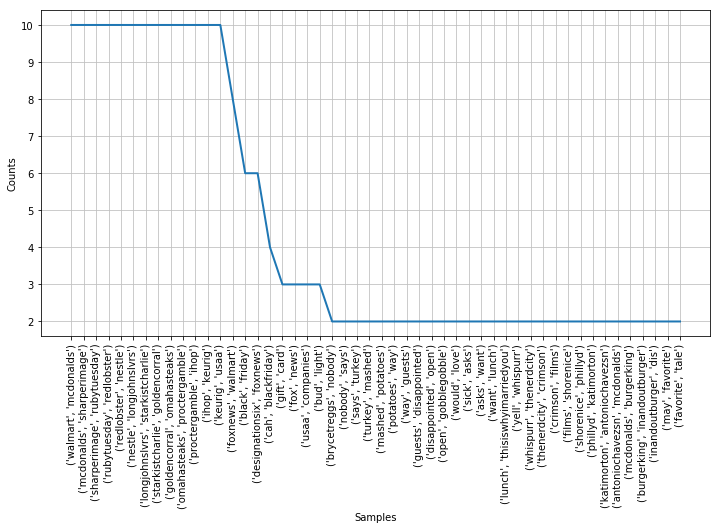

In [56]:
plt.figure(figsize=(12,6))
fdist.plot(50)

### Many of the words that appear in a frequent bigram of all tweets include:
* a list of companies that sponsor fox news
* turkey
* mashed turkey
* guests, dissapointed
* dissapointed, open
* gobble gobble
* would love
* sick asks
* want lunch

'Word cloud of applebees all tweets'

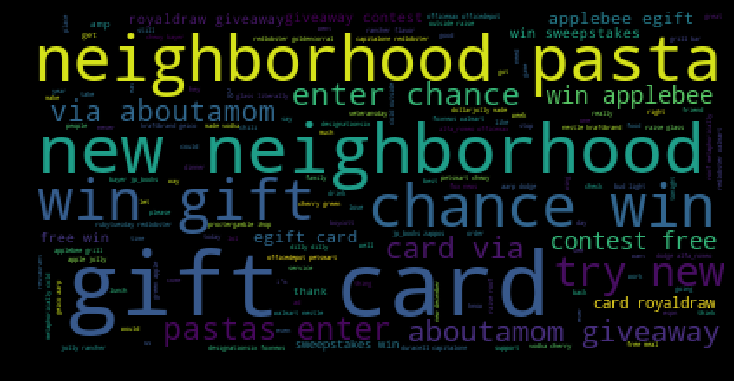

In [57]:
wordcloud = WordCloud(stopwords=extra_stoplist).generate(' '.join(df['texts']))
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title = 'Word cloud of applebees all tweets'
plt.title

### The wordcloud includes a lot of phrases discussed in the hashtags and mentions section, including the royal draw account, aboutamom giveaway, and the neighborhood pasta campaign.

### Positive tweets

In [58]:
df_pos = df.loc[df['pos'] == 1]

In [59]:
# currently the data are in list ... convert to string
tokens = df_pos['texts']
#lowecases
#tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", str(tokens))
#tokenization or word split
tokens = word_tokenize(tokens)
#Remove stopwords
more_stopwords = set(('applebee', 'applebees','https','rt','co'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... tokens are two tokens
bgs = nltk.bigrams(tokens)

In [60]:
fdist = nltk.FreqDist(bgs)
fdist

FreqDist({('walmart', 'mcdonalds'): 18, ('mcdonalds', 'sharperimage'): 17, ('sharperimage', 'rubytuesday'): 17, ('rubytuesday', 'redlobster'): 17, ('redlobster', 'nestle'): 17, ('nestle', 'longjohnslvrs'): 17, ('longjohnslvrs', 'starkistcharlie'): 17, ('starkistcharlie', 'goldencorral'): 17, ('goldencorral', 'omahasteaks'): 17, ('omahasteaks', 'proctergamble'): 17, ...})

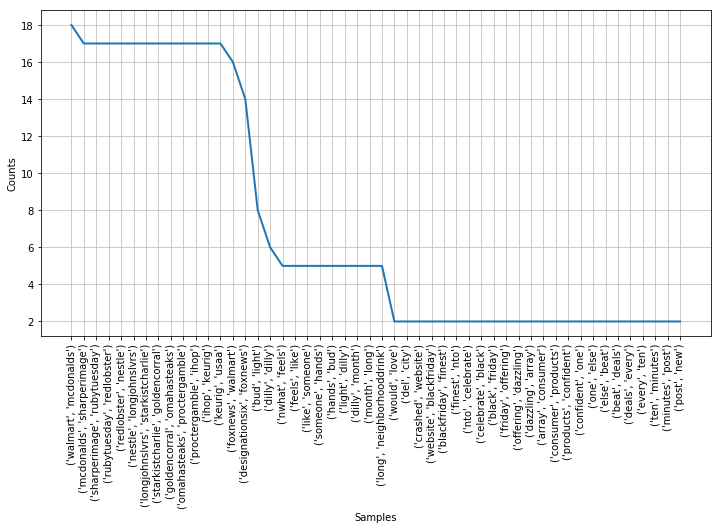

In [61]:
plt.figure(figsize=(12,6))
fdist.plot(50)

### Many of the words that appear in a frequent bigram of all tweets include:
* a list of companies that sponsor fox news
* feels like
* hands bud
* light dilly
* month long
* long neighborhood
* would love
* crashed website
* website blackfriday, blackfriday finest
* friday offering
* offering dazzling
* array consumer, consumer products
* products confirm

'Word cloud of applebees with positive tweets'

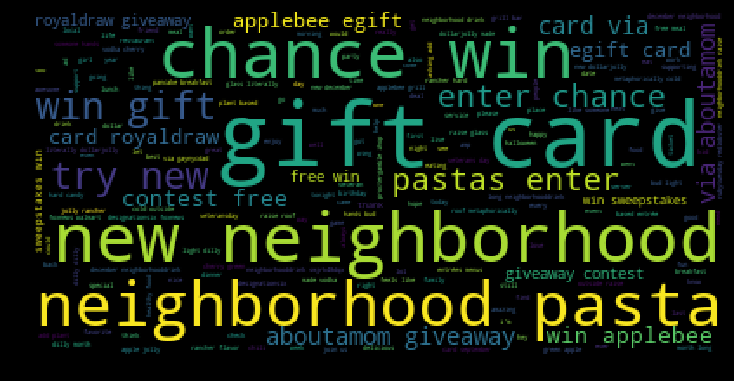

In [62]:
wordcloud = WordCloud(stopwords=extra_stoplist).generate(' '.join(df_pos['texts']))
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title = 'Word cloud of applebees with positive tweets'
plt.title

### The word cloud for positive tweets is almost identical to the word cloud for all tweets. This is because most of the tweets are positive tweets.

### Neutral tweets

In [63]:
df_neu = df.loc[df['neu'] == 1]

In [64]:
# currently the data are in list ... convert to string
tokens = df_neu['texts']
#lowecases
#tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", str(tokens))
#tokenization or word split
tokens = word_tokenize(tokens)
#Remove stopwords
more_stopwords = set(('applebee', 'applebees','https','rt', 'co'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... tokens are two tokens
bgs = nltk.bigrams(tokens)

In [65]:
fdist = nltk.FreqDist(bgs)
fdist

FreqDist({('foxnews', 'walmart'): 11, ('walmart', 'mcdonalds'): 11, ('mcdonalds', 'sharperimage'): 11, ('sharperimage', 'rubytuesday'): 11, ('rubytuesday', 'redlobster'): 11, ('redlobster', 'nestle'): 11, ('nestle', 'longjohnslvrs'): 11, ('longjohnslvrs', 'starkistcharlie'): 11, ('starkistcharlie', 'goldencorral'): 11, ('goldencorral', 'omahasteaks'): 11, ...})

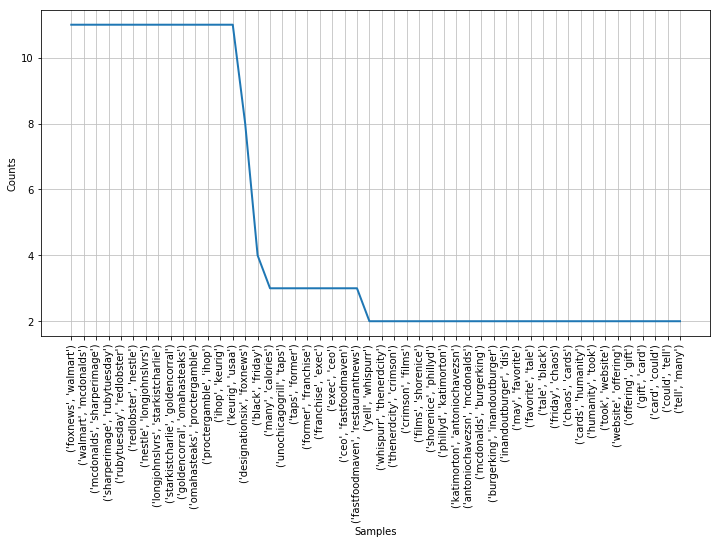

In [66]:
plt.figure(figsize=(12,6))
fdist.plot(50)

### Many of the words that appear in a frequent bigram of all tweets include:
* a list of companies that sponsor fox news
* many calories
* black friday
* references to Chicago Uno hiring an Applebee's franchise exec as its CEO
* favorite tale, tale black
* friday chaos, chaos cards, cards humanity
* took website, website offering, offering gift
* gift card, card could, could tell, tell many

'Word cloud of applebees with neutural tweets'

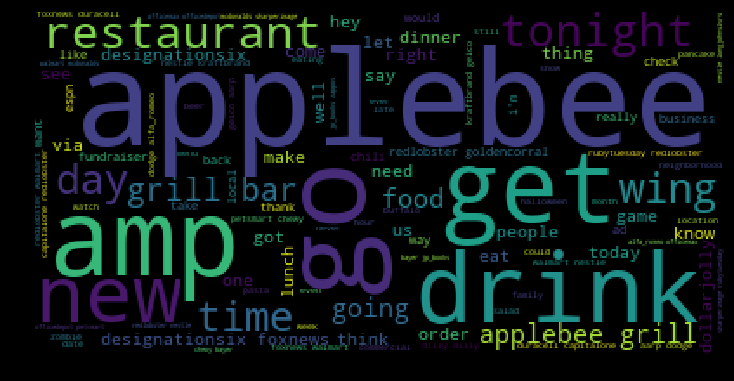

In [67]:
wordcloud = WordCloud(stopwords=extra_stoplist).generate(' '.join(df_neu['texts']))
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title = 'Word cloud of applebees with neutural tweets'
plt.title

### The word cloud for neutral twetes shows many terms that are on topic to applebee's, including grill, food, drink, doller jolly, lunch, and order.

### Negative tweets

In [68]:
df_neg = df.loc[df['neg'] == 1]
df_neg.head(1)

,id,texts,created_at_string,favorite_count,follower_count,following_count,geo_coordinates,hashtags,lang,profile_location,...,user_id,user_mentions,mentions,cleaned,retweet,on_topic,sentiment,pos,neg,neu
created_at,,,,,,,,,,,,,,,,,,,,,
2018-11-23 14:11:39,1065971140072538112,"@brycetreggs nobody says you have to have turkey and mashed potatoes! do it your way. if the guests are disappointed, applebee's is open! #gobblegobble",2018-11-23T14:11:39.000Z,0,116,452,NaN,gobblegobble,en,"{'country': 'United States', 'country_code': 'US', 'region': 'Delaware', 'full_name': 'Delaware, United States', 'geo': {'coordinates': [-75.49992, 39.00039], 'type': 'point'}}",...,133879900,"[{'screen_name': 'BryceTreggs', 'name': 'Trigga', 'id': 322362841, 'id_str': '322362841', 'indices': [0, 12]}]",brycetreggs,nobody says have have turkey mashed potatoes your guests disappointed applebee open gobblegobble,0,0,-0.5696,0,1,0


In [69]:
# currently the data are in list ... convert to string
tokens = df_neg['texts']
#lowecases
#tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", str(tokens))
#tokenization or word split
tokens = word_tokenize(tokens)
#Remove stopwords
more_stopwords = set(('applebee', 'applebees','https','rt','co'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... tokens are two tokens
bgs = nltk.bigrams(tokens)

In [70]:
fdist = nltk.FreqDist(bgs)
fdist

FreqDist({('walmart', 'mcdonalds'): 16, ('mcdonalds', 'sharperimage'): 16, ('sharperimage', 'rubytuesday'): 16, ('rubytuesday', 'redlobster'): 16, ('redlobster', 'nestle'): 16, ('nestle', 'longjohnslvrs'): 16, ('longjohnslvrs', 'starkistcharlie'): 16, ('starkistcharlie', 'goldencorral'): 16, ('goldencorral', 'omahasteaks'): 16, ('omahasteaks', 'proctergamble'): 16, ...})

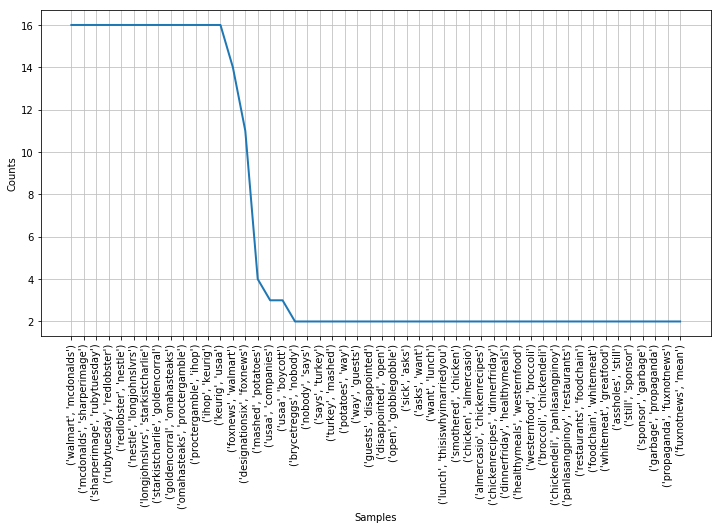

In [71]:
plt.figure(figsize=(12,6))
fdist.plot(50)

### Many of the words that appear in a frequent bigram of all tweets include:
* a list of companies that sponsor fox news
* says turkey
* guests dissapointed
* open gobble gobble
* sick asks
* asks want
* want lunch
* chicken almercasio, chicken friday healthymeals
* westernfood broccoli
* brocolli chicken deli
* restaurant foodchain
* foodchain whitemeat
* asshole still

'Word cloud of applebees with negative tweets'

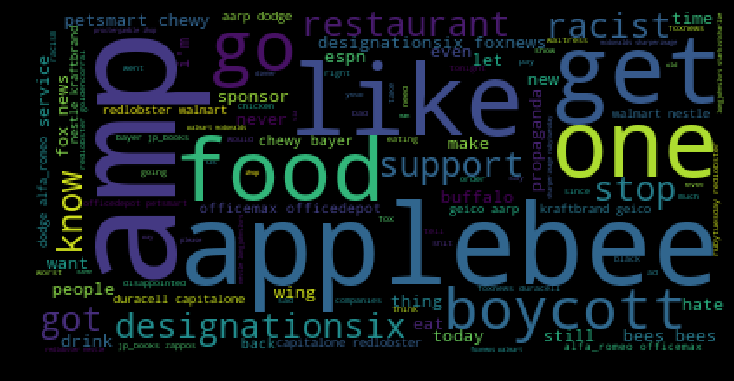

In [72]:
wordcloud = WordCloud(stopwords=extra_stoplist).generate(' '.join(df_neg['texts']))
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title = 'Word cloud of applebees with negative tweets'
plt.title

### Many words on the word cloud reference the fox news boycott.

## On topic tweets

In [73]:
df_on = df.loc[df['on_topic'] == 1]

In [74]:
# currently the data are in list ... convert to string
tokens = df_on['texts']
#lowecases
#tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", str(tokens))
#tokenization or word split
tokens = word_tokenize(tokens)
#Remove stopwords
more_stopwords = set(('applebee', 'applebees','https','rt','co'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... tokens are two tokens
bgs = nltk.bigrams(tokens)

In [75]:
fdist = nltk.FreqDist(bgs)
fdist

FreqDist({('walmart', 'mcdonalds'): 19, ('mcdonalds', 'sharperimage'): 19, ('sharperimage', 'rubytuesday'): 19, ('rubytuesday', 'redlobster'): 19, ('redlobster', 'nestle'): 19, ('nestle', 'longjohnslvrs'): 19, ('longjohnslvrs', 'starkistcharlie'): 19, ('starkistcharlie', 'goldencorral'): 19, ('goldencorral', 'omahasteaks'): 19, ('omahasteaks', 'proctergamble'): 19, ...})

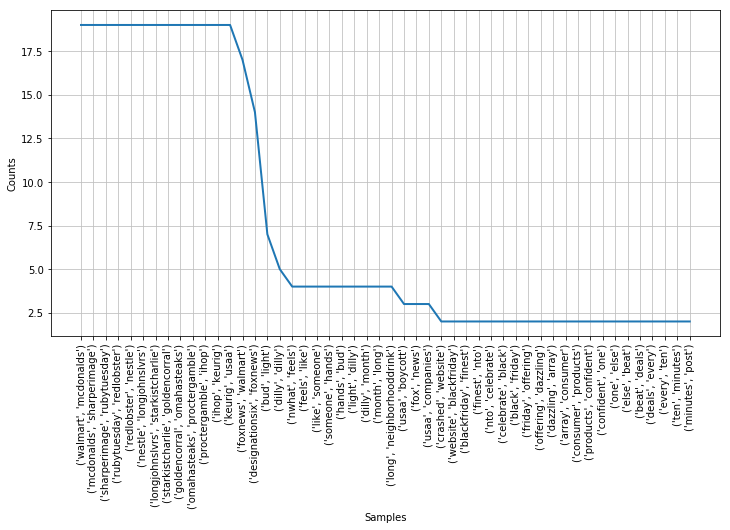

In [76]:
plt.figure(figsize=(12,6))
fdist.plot(50)

### Even when tweets were filtered by on-topic keywords foxnews tweets remained. There were also a lot of tweets about budweiser's dilly dilly campagin which also doesn't seem to be on-topic on the surface. There are a lot of mentions abotu consumer products, deails, and black friday as well.

'Word cloud of applebees with on topic tweets'

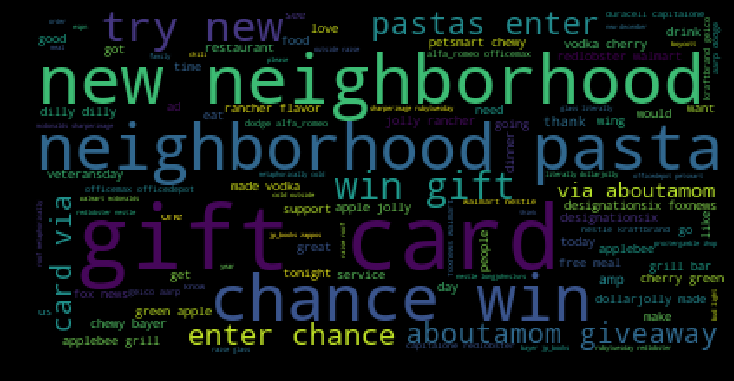

In [77]:
wordcloud = WordCloud(stopwords=extra_stoplist).generate(' '.join(df_on['texts']))
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title = 'Word cloud of applebees with on topic tweets'
plt.title

### The word cloud of on topic tweets mostly center around gift cards, deals, and promotions.

In [78]:
df_on['sentiment'].mean()

0.3468358912594626

## Off topic tweets

In [79]:
df_off = df.loc[df['on_topic'] == 0]

In [80]:
# currently the data are in list ... convert to string
tokens = df_off['texts']
#lowecases
#tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", str(tokens))
#tokenization or word split
tokens = word_tokenize(tokens)
#Remove stopwords
more_stopwords = set(('applebee', 'applebees','https','rt','co'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... tokens are two tokens
bgs = nltk.bigrams(tokens)

In [81]:
fdist = nltk.FreqDist(bgs)
fdist

FreqDist({('black', 'friday'): 4, ('cah', 'blackfriday'): 4, ('gift', 'card'): 3, ('many', 'calories'): 3, ('grilled', 'chicken'): 3, ('brycetreggs', 'nobody'): 2, ('nobody', 'says'): 2, ('says', 'turkey'): 2, ('turkey', 'mashed'): 2, ('mashed', 'potatoes'): 2, ...})

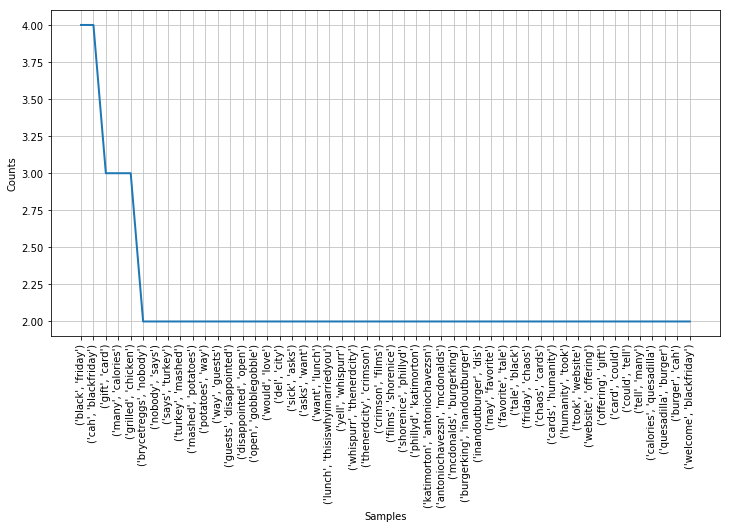

In [82]:
plt.figure(figsize=(12,6))
fdist.plot(50)

### Popular bigrams in off-topic tweets do not include fox-news boycott terms. Instead they include terms about black-friday, and many other topics that are difficult to categorize or tie to applebee's. 

'Word cloud of applebees with on topic tweets'

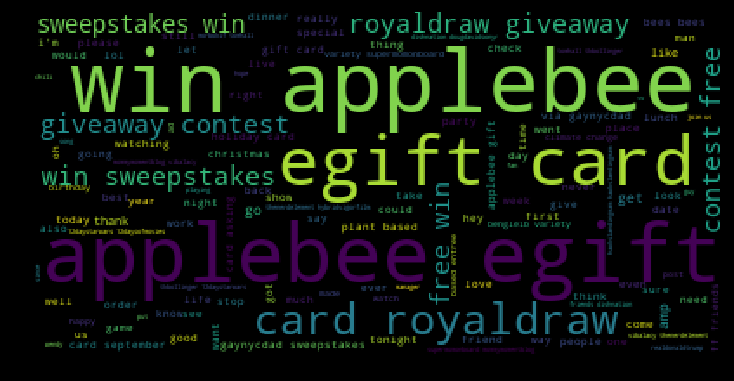

In [83]:
wordcloud = WordCloud(stopwords=extra_stoplist).generate(' '.join(df_off['texts']))
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title = 'Word cloud of applebees with on topic tweets'
plt.title

In [84]:
df_off['sentiment'].mean()

0.30450699379582463

### On-topic tweets have a higher average than off-topic tweets (.35 vs .30) both categories can be classified as positive.

# Topic Modeling

## All Tweets

In [85]:
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", str(document)) for document in df['texts']]
# tokenize & lowercase
texts = [document.lower().split() for document in documents]
# stemming words: having --> have; friends --> friend
wordnet_lemmatizer = WordNetLemmatizer()
texts = [[wordnet_lemmatizer.lemmatize(word) for word in tokens] for tokens in texts]
# remove common words
stoplist = stopwords.words('english')
texts = [ [word for word in tokens if word not in stoplist] for tokens in texts]
# remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [86]:
dictionary = Dictionary(texts)
len(dictionary)

16630

In [87]:
dictionary.filter_extremes(no_below=5, no_above=0.5) 

In [88]:
texts = list(texts)

In [89]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpus[:1]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1)]]

In [90]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1884
Number of documents: 4679


In [91]:
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, passes=20)

In [92]:
model.show_topics(num_topics=2)

[(4,
  '0.047*"applebee" + 0.017*"amp" + 0.013*"bar" + 0.013*"tonight" + 0.012*"time" + 0.011*"one" + 0.011*"got" + 0.011*"love" + 0.010*"grill" + 0.010*"restaurant"'),
 (6,
  '0.082*"gift" + 0.078*"new" + 0.078*"via" + 0.077*"card" + 0.075*"try" + 0.071*"pasta" + 0.070*"neighborhood" + 0.068*"giveaway" + 0.067*"win" + 0.066*"chance"')]

In [93]:
lda_corpus = model[corpus]

results = []
for i in lda_corpus:
    #print(i)
    results.append(i)

In [94]:
# finding highest value from each row
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]
toptopic[:5]

[2, 4, 2, 0, 0]

In [95]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

C:\Users\ajeda\Anaconda2\envs\py36\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.148182 -0.107970  1       1        8.617889 
1      0.028669 -0.040645  2       1        4.751019 
2     -0.059923  0.038638  3       1        5.809061 
3      0.165969 -0.061893  4       1        13.113695
4      0.184627 -0.084414  5       1        13.446540
5      0.017571  0.424309  6       1        14.160728
6     -0.379798 -0.029251  7       1        14.651942
7     -0.295953 -0.108424  8       1        11.519948
8      0.052696  0.013242  9       1        4.406331 
9      0.137962 -0.043592  10      1        9.522847 , topic_info=     Category         Freq               Term        Total  loglift  logprob
213   Default  1487.000000  win                1487.000000  30.0000  30.0000
660   Default  932.000000   royaldraw          932.000000   29.0000  29.0000
41    Default  1120.000000  card               1120.000000  28.0000  28.0000
617   Default  1017.000000  giveaway           1017.000000  27.0000  27.0000
937   Default  609.000000   via                609.000000   26.0000  26.0000
62    Default  794.000000   new                794.000000   25.0000  25.0000
290   Default  584.000000   try                584.000000   24.0000  24.0000
271   Default  577.000000   free               577.000000   23.0000  23.0000
661   Default  493.000000   sweepstakes        493.000000   22.0000  22.0000
200   Default  492.000000   contest            492.000000   21.0000  21.0000
1315  Default  551.000000   pasta              551.000000   20.0000  20.0000
45    Default  700.000000   gift               700.000000   19.0000  19.0000
659   Default  466.000000   egift              466.000000   18.0000  18.0000
257   Default  516.000000   chance             516.000000   17.0000  17.0000
1172  Default  498.000000   enter              498.000000   16.0000  16.0000
356   Default  591.000000   neighborhood       591.000000   15.0000  15.0000
1314  Default  489.000000   aboutamom          489.000000   14.0000  14.0000
0     Default  1425.000000  applebee           1425.000000  13.0000  13.0000
136   Default  330.000000   foxnews            330.000000   12.0000  12.0000
1816  Default  222.000000   dollarjolly        222.000000   11.0000  11.0000
145   Default  268.000000   redlobster         268.000000   10.0000  10.0000
1147  Default  179.000000   jolly              179.000000   9.0000   9.0000 
222   Default  162.000000   neighborhooddrink  162.000000   8.0000   8.0000 
152   Default  262.000000   walmart            262.000000   7.0000   7.0000 
1826  Default  163.000000   rancher            163.000000   6.0000   6.0000 
141   Default  240.000000   nestle             240.000000   5.0000   5.0000 
847   Default  147.000000   green              147.000000   4.0000   4.0000 
134   Default  237.000000   designationsix     237.000000   3.0000   3.0000 
84    Default  225.000000   ihop               225.000000   2.0000   2.0000 
1828  Default  149.000000   vodka              149.000000   1.0000   1.0000 
...       ...         ...     ...                     ...      ...      ... 
1549  Topic10  19.105606    hatred             19.973932    2.3070  -5.5800 
816   Topic10  17.162704    driving            18.030989    2.3021  -5.6873 
1011  Topic10  16.757265    meat               17.625549    2.3010  -5.7112 
974   Topic10  15.983773    yum                16.852068    2.2986  -5.7584 
1021  Topic10  15.502504    difference         16.371223    2.2970  -5.7890 
1273  Topic10  15.388885    bet                16.257168    2.2966  -5.7964 
651   Topic10  15.241483    shame              16.109926    2.2961  -5.8060 
592   Topic10  14.824351    program            15.692736    2.2945  -5.8337 
870   Topic10  14.299695    marketing          15.172462    2.2922  -5.8698 
560   Topic10  47.589130    cocktail           50.864853    2.2849  -4.6674 
981   Topic10  20.457048    send               22.188139    2.2702  -5.5117

### All tweets include the following general topics:
* The biggest topic is about the aboutamom giveaway, followed by the fox news boycott, the third topic is about general applebee's topics, the forth largest topic discusses veterans day and other fundraisers
* There is a topic that uses language about Applebee's promotions
* There is a whole topic that focuses mainly on Applebee's Dollar Jolly drink promotion, that was ran mid-November through December.

## High sentiment topic modeling 1

In [201]:
df1 = df.loc['2018-10-28']

In [202]:
df1.head()

,id,texts,created_at_string,favorite_count,follower_count,following_count,geo_coordinates,hashtags,lang,profile_location,...,user_id,user_mentions,mentions,cleaned,retweet,on_topic,sentiment,pos,neg,neu
created_at,,,,,,,,,,,,,,,,,,,,,
2018-10-28 19:40:16,1056631757330702337,try new neighborhood pastas at @applebees! enter for a chance to win a $25 gift card via @aboutamom #giveaway https://t.co/hm7cbtrziu,2018-40-28T19:40:16.000Z,0,2159,3979,NaN,giveaway,en,"{'country': 'United States', 'country_code': 'US', 'locality': 'Wichita', 'region': 'Kansas', 'sub_region': 'Sedgwick County', 'full_name': 'Wichita, Kansas, United States', 'geo': {'coordinates': [-97.33754, 37.69224], 'type': 'point'}}",...,33159299,"[{'screen_name': 'Applebees', 'name': ""Applebee's"", 'id': 74452613, 'id_str': '74452613', 'indices': [31, 41]}, {'screen_name': 'aboutamom', 'name': 'About A Mom | Angela', 'id': 280678037, 'id_str': '280678037', 'indices': [89, 99]}]","applebees, aboutamom",neighborhood pastas enter chance gift card giveaway,0,1,0.8398,1,0,0
2018-10-28 19:49:02,1056633962381107201,try new neighborhood pastas at @applebees! enter for a chance to win a $25 gift card via @aboutamom #giveaway https://t.co/7cvqetqjxj,2018-49-28T19:49:02.000Z,0,294,787,NaN,giveaway,en,"{'country': 'United States', 'country_code': 'US', 'locality': 'Grand Rapids', 'region': 'Michigan', 'sub_region': 'Kent County', 'full_name': 'Grand Rapids, Michigan, United States', 'geo': {'coordinates': [-85.66809, 42.96336], 'type': 'point'}}",...,924662773702975488,"[{'screen_name': 'Applebees', 'name': ""Applebee's"", 'id': 74452613, 'id_str': '74452613', 'indices': [31, 41]}, {'screen_name': 'aboutamom', 'name': 'About A Mom | Angela', 'id': 280678037, 'id_str': '280678037', 'indices': [89, 99]}]","applebees, aboutamom",neighborhood pastas enter chance gift card giveaway,0,1,0.8398,1,0,0
2018-10-28 20:00:43,1056636900835033088,".#icymi a friendly reminder that @applebeesny branches in #astoria and #bayside will offer signature breakfast service at no cost to dine-in guests on monday, nov. 5, from 8 am to noon. https://t.co/jykrdtfnkn https://t.co/ssaas312ru",2018-00-28T20:00:43.000Z,2,7378,1659,NaN,icymi astoria bayside,en,"{'country': 'United States', 'country_code': 'US', 'region': 'New York', 'full_name': 'New York, United States', 'geo': {'coordinates': [-75.4999, 43.00035], 'type': 'point'}}",...,741000470,"[{'screen_name': 'ApplebeesNY', 'name': ""Applebee's New York"", 'id': 52408248, 'id_str': '52408248', 'indices': [33, 45]}]",applebeesny,icymi friendly reminder that branches astoria bayside will offer signature breakfast service cost dine guests monday from noon,0,1,0.2500,0,0,1
2018-10-28 20:19:44,1056641687911575552,try new neighborhood pastas at @applebees! enter for a chance to win a $25 gift card via @aboutamom #giveaway https://t.co/infgwquhez,2018-19-28T20:19:44.000Z,0,78,1150,NaN,giveaway,en,"{'country': 'United States', 'country_code': 'US', 'locality': 'Chicago', 'region': 'Illinois', 'sub_region': 'Cook County', 'full_name': 'Chicago, Illinois, United States', 'geo': {'coordinates': [-87.65005, 41.85003], 'type': 'point'}}",...,890306393558982664,"[{'screen_name': 'Applebees', 'name': ""Applebee's"", 'id': 74452613, 'id_str': '74452613', 'indices': [31, 41]}, {'screen_name': 'aboutamom', 'name': 'About A Mom | Angela', 'id': 280678037, 'id_str': '280678037', 'indices': [89, 99]}]","applebees, aboutamom",neighborhood pastas enter chance gift card giveaway,0,1,0.8398,1,0,0
2018-10-28 20:22:38,1056642417309483009,sitting in @applebees and @jessemccartney leavin’ comes on. so you know that i get so hyped and everyone looks at me like i’ve lost my mind. #jessemccartney4life,2018-22-28T20:22:38.000Z,0,32,143,NaN,jessemccartney4life,en,"{'country': 'United States', 'country_code': 'US', 'region': 'Minnesota', 'full_name': 'Minnesota, United States', 'geo': {'coordinates': [-94.25055, 46.25024], 'type': 'point'}}",...,796922768054951936,"[{'screen_name': 'App

In [203]:
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", str(document)) for document in df1['texts']]
# tokenize & lowercase
texts = [document.lower().split() for document in documents]
# stemming words: having --> have; friends --> friend
wordnet_lemmatizer = WordNetLemmatizer()
texts = [[wordnet_lemmatizer.lemmatize(word) for word in tokens] for tokens in texts]
# remove common words
stoplist = stopwords.words('english')
texts = [ [word for word in tokens if word not in stoplist] for tokens in texts]
# remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [204]:
dictionary = Dictionary(texts)
len(dictionary)

352

In [205]:
#dictionary.filter_extremes(no_below=5, no_above=0.5) 

In [206]:
texts = list(texts)

In [207]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpus[:1]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1)]]

In [208]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 352
Number of documents: 62


In [209]:
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, passes=20)

In [210]:
model.show_topics(num_topics=2)

[(0,
  '0.027*"applebees" + 0.027*"better" + 0.027*"manager" + 0.027*"daveroberts" + 0.027*"met" + 0.027*"dodgersvsredsox" + 0.002*"http" + 0.002*"head" + 0.002*"paying" + 0.002*"responsibility"'),
 (1,
  '0.058*"applebees" + 0.024*"http" + 0.024*"enjoy" + 0.024*"menu" + 0.012*"new" + 0.012*"dessert" + 0.012*"iamheartbroken" + 0.012*"bring" + 0.012*"back" + 0.012*"apple"')]

In [211]:
lda_corpus = model[corpus]

results = []
for i in lda_corpus:
    #print(i)
    results.append(i)

In [212]:
# finding highest value from each row
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]
toptopic[:5]

[7, 7, 5, 7, 3]

In [213]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

C:\Users\ajeda\Anaconda2\envs\py36\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.045077 -0.002850  1       1        1.099791 
1      0.016856  0.055264  2       1        5.581973 
2      0.048164  0.032145  3       1        3.268201 
3      0.037225  0.047701  4       1        4.629797 
4      0.046918  0.085952  5       1        6.444535 
5      0.028959  0.003686  6       1        4.698695 
6      0.062931 -0.206434  7       1        10.361193
7     -0.398680 -0.012308  8       1        55.388905
8      0.055845  0.003819  9       1        7.945043 
9      0.056705 -0.006976  10      1        0.581883 , topic_info=    Category       Freq            Term      Total  loglift  logprob
1    Default  49.000000  applebees       49.000000  30.0000  30.0000
8    Default  47.000000  http            47.000000  29.0000  29.0000
13   Default  35.000000  via             35.000000  28.0000  28.0000
2    Default  34.000000  card            34.000000  27.0000  27.0000
0    Default  34.000000  aboutamom       34.000000  26.0000  26.0000
4    Default  34.000000  chance          34.000000  25.0000  25.0000
6    Default  34.000000  gift            34.000000  24.0000  24.0000
11   Default  34.000000  pasta           34.000000  23.0000  23.0000
5    Default  34.000000  enter           34.000000  22.0000  22.0000
14   Default  34.000000  win             34.000000  21.0000  21.0000
7    Default  34.000000  giveaway        34.000000  20.0000  20.0000
9    Default  34.000000  neighborhood    34.000000  19.0000  19.0000
12   Default  34.000000  try             34.000000  18.0000  18.0000
10   Default  35.000000  new             35.000000  17.0000  17.0000
50   Default  5.000000   applebee        5.000000   16.0000  16.0000
44   Default  4.000000   like            4.000000   15.0000  15.0000
207  Default  2.000000   zombie          2.000000   14.0000  14.0000
76   Default  3.000000   thanks          3.000000   13.0000  13.0000
70   Default  2.000000   grill           2.000000   12.0000  12.0000
65   Default  2.000000   bar             2.000000   11.0000  11.0000
142  Default  3.000000   head            3.000000   10.0000  10.0000
67   Default  1.000000   birthday        1.000000   9.0000   9.0000 
86   Default  2.000000   one             2.000000   8.0000   8.0000 
24   Default  2.000000   guest           2.000000   7.0000   7.0000 
58   Default  1.000000   sar             1.000000   6.0000   6.0000 
40   Default  1.000000   jessemccartney  1.000000   5.0000   5.0000 
159  Default  2.000000   sponsor         2.000000   4.0000   4.0000 
110  Default  1.000000   enjoy           1.000000   3.0000   3.0000 
116  Default  1.000000   menu            1.000000   2.0000   2.0000 
184  Default  1.000000   dollar          1.000000   1.0000   1.0000 
..       ...       ...      ...               ...      ...      ... 
93   Topic10  0.016415   xhhzk           1.163847   0.8854  -5.8636 
0    Topic10  0.016415   aboutamom       34.552460 -2.5054  -5.8636 
7    Topic10  0.016415   giveaway        34.552197 -2.5054  -5.8636 
14   Topic10  0.016415   win             34.552235 -2.5054  -5.8636 
13   Topic10  0.016415   via             35.140247 -2.5222  -5.8636 
12   Topic10  0.016415   try             34.551964 -2.5054  -5.8636 
11   Topic10  0.016415   pasta           34.552376 -2.5054  -5.8636 
9    Topic10  0.016415   neighborhood    34.551914 -2.5054  -5.8636 
8    Topic10  0.016415   http            47.470070 -2.8230  -5.8636 
10   Topic10  0.016415   new             35.171196 -2.5231  -5.8636 
6    Topic10  0.016415   gift            34.552250 -2.5054  -5.8636 
5    Topic10  0.016415   enter           34.552307 -2.5054  -5.8636 
4    Topic10  0.016415   chance          34.552448 -2.5054  -5.8636 
2    Topic10  0.016415   card            34.552563 -2.5054  -5.8636 
1    Topic10  0.016415   applebees       49.107315 -2.8569  -5.8636 
124  Topic10  0.016415   worldseries     1.829152   0.4332  -5.863

### On October 28th the most popular topic was the about a mom blog giveaway. This promotion was still going on at this time. This is a very positive topic. Other topics include:
* Fox News boycott
* Fundraisers
* Dollar Zombie Drink Promotion

## High sentiment topic modeling 2

In [214]:
df2 = df.loc['2018-11-05']

In [215]:
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", str(document)) for document in df2['texts']]
# tokenize & lowercase
texts = [document.lower().split() for document in documents]
# stemming words: having --> have; friends --> friend
wordnet_lemmatizer = WordNetLemmatizer()
texts = [[wordnet_lemmatizer.lemmatize(word) for word in tokens] for tokens in texts]
# remove common words
stoplist = stopwords.words('english')
texts = [ [word for word in tokens if word not in stoplist] for tokens in texts]
# remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [216]:
dictionary = Dictionary(texts)
len(dictionary)

294

In [217]:
#dictionary.filter_extremes(no_below=5, no_above=0.5) 

In [218]:
texts = list(texts)

In [219]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpus[:1]

[[(0, 1),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 3),
  (6, 2),
  (7, 1),
  (8, 2),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 4),
  (13, 1)]]

In [220]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 294
Number of documents: 44


In [221]:
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, passes=20)

In [222]:
model.show_topics(num_topics=2)

[(1,
  '0.029*"applebees" + 0.026*"cyclone" + 0.014*"join" + 0.014*"tonight" + 0.014*"iastatead" + 0.014*"ames" + 0.014*"guest" + 0.014*"cycorner" + 0.014*"corner" + 0.014*"host"'),
 (8,
  '0.031*"applebees" + 0.030*"imgoodluv" + 0.030*"need" + 0.030*"thanks" + 0.030*"back" + 0.030*"zpor" + 0.030*"rxydpya" + 0.003*"enter" + 0.003*"neighborhood" + 0.003*"pasta"')]

In [223]:
lda_corpus = model[corpus]

results = []
for i in lda_corpus:
    #print(i)
    results.append(i)

In [224]:
# finding highest value from each row
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]
toptopic[:5]

[2, 1, 9, 2, 5]

In [225]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

C:\Users\ajeda\Anaconda2\envs\py36\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.053166 -0.007089  1       1        0.563228 
1     -0.060974 -0.078724  2       1        7.066522 
2     -0.018981 -0.093952  3       1        15.359972
3      0.388386  0.003912  4       1        39.286880
4     -0.053228 -0.003575  5       1        2.333324 
5     -0.038366 -0.052273  6       1        12.058969
6     -0.024856 -0.006670  7       1        4.387703 
7     -0.053122 -0.003704  8       1        2.476433 
8     -0.040545 -0.023640  9       1        1.391265 
9     -0.045148  0.265716  10      1        15.075705, topic_info=    Category       Freq               Term      Total  loglift  logprob
7    Default  42.000000  http               42.000000  30.0000  30.0000
34   Default  8.000000   dilly              8.000000   29.0000  29.0000
1    Default  27.000000  applebees          27.000000  28.0000  28.0000
234  Default  18.000000  try                18.000000  27.0000  27.0000
227  Default  18.000000  enter              18.000000  26.0000  26.0000
229  Default  18.000000  giveaway           18.000000  25.0000  25.0000
231  Default  18.000000  new                18.000000  24.0000  24.0000
228  Default  18.000000  gift               18.000000  23.0000  23.0000
226  Default  18.000000  chance             18.000000  22.0000  22.0000
233  Default  18.000000  pasta              18.000000  21.0000  21.0000
236  Default  18.000000  via                18.000000  20.0000  20.0000
224  Default  18.000000  aboutamom          18.000000  19.0000  19.0000
225  Default  18.000000  card               18.000000  18.0000  18.0000
237  Default  18.000000  win                18.000000  17.0000  17.0000
230  Default  18.000000  neighborhood       18.000000  16.0000  16.0000
12   Default  8.000000   veteran            8.000000   15.0000  15.0000
5    Default  6.000000   free               6.000000   14.0000  14.0000
43   Default  5.000000   month              5.000000   13.0000  13.0000
53   Default  4.000000   applebee           4.000000   12.0000  12.0000
33   Default  4.000000   bud                4.000000   11.0000  11.0000
35   Default  4.000000   dqx                4.000000   10.0000  10.0000
44   Default  4.000000   neighborhooddrink  4.000000   9.0000   9.0000 
46   Default  4.000000   smjrk              4.000000   8.0000   8.0000 
38   Default  4.000000   hand               4.000000   7.0000   7.0000 
42   Default  4.000000   long               4.000000   6.0000   6.0000 
40   Default  4.000000   light              4.000000   5.0000   5.0000 
47   Default  4.000000   someone            4.000000   4.0000   4.0000 
36   Default  4.000000   feel               4.000000   3.0000   3.0000 
41   Default  4.000000   like               4.000000   2.0000   2.0000 
6    Default  3.000000   hero               3.000000   1.0000   1.0000 
..       ...       ...    ...                    ...      ...      ... 
33   Topic10  3.991832   bud                4.474173   1.7780  -3.3208 
35   Topic10  3.991818   dqx                4.474166   1.7780  -3.3208 
44   Topic10  3.991816   neighborhooddrink  4.474165   1.7780  -3.3208 
46   Topic10  3.991812   smjrk              4.474164   1.7780  -3.3208 
38   Topic10  3.991812   hand               4.474164   1.7780  -3.3208 
42   Topic10  3.991808   long               4.474162   1.7780  -3.3208 
40   Topic10  3.991804   light              4.474159   1.7780  -3.3208 
47   Topic10  3.991802   someone            4.474158   1.7780  -3.3208 
36   Topic10  3.991801   feel               4.474158   1.7780  -3.3208 
41   Topic10  3.991800   like               4.474158   1.7780  -3.3208 
45   Topic10  0.861159   rvdflomut          1.343035   1.4477  -4.8545 
155  Topic10  0.861159   huge               1.343035   1.4477  -4.8545 
39   Topic10  0.861159   jchristo           1.343035   1.4477  -4.8545 
48   Topic10  0.861159   woah               1.343035   1.4477  -4.854

### The most popular topic on 11/05 was still the About a Mom blog giveaway. The next most popular topics were:
* Budlight and their Dilly Dilly campaign
* Upcoming veteran's day promotions

## Low sentiment topic modeling 1

In [226]:
df3 = df.loc['2018-12-25']

In [227]:
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", str(document)) for document in df3['texts']]
# tokenize & lowercase
texts = [document.lower().split() for document in documents]
# stemming words: having --> have; friends --> friend
wordnet_lemmatizer = WordNetLemmatizer()
texts = [[wordnet_lemmatizer.lemmatize(word) for word in tokens] for tokens in texts]
# remove common words
stoplist = stopwords.words('english')
texts = [ [word for word in tokens if word not in stoplist] for tokens in texts]
# remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [228]:
dictionary = Dictionary(texts)
len(dictionary)

225

In [229]:
#dictionary.filter_extremes(no_below=5, no_above=0.5) 

In [230]:
texts = list(texts)

In [231]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpus[:1]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1)]]

In [232]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 225
Number of documents: 14


In [233]:
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, passes=20)

In [234]:
model.show_topics(num_topics=2)

[(3,
  '0.063*"http" + 0.033*"want" + 0.033*"lkvt" + 0.033*"vugfblxjwq" + 0.033*"smm" + 0.033*"check" + 0.033*"see" + 0.033*"cool" + 0.033*"socialsales" + 0.033*"applebees"'),
 (7,
  '0.033*"rude" + 0.022*"applebees" + 0.012*"even" + 0.012*"bwwsprobz" + 0.012*"could" + 0.012*"customerservice" + 0.012*"dinner" + 0.012*"eve" + 0.012*"late" + 0.012*"since"')]

In [235]:
lda_corpus = model[corpus]

results = []
for i in lda_corpus:
    #print(i)
    results.append(i)

In [236]:
# finding highest value from each row
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]
toptopic[:5]

[3, 2, 9, 8, 8]

In [237]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

C:\Users\ajeda\Anaconda2\envs\py36\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.034952  0.067164  1       1        13.477951
1      0.008708  0.007786  2       1        0.456931 
2     -0.044128 -0.038498  3       1        15.323626
3     -0.011406  0.023316  4       1        3.982578 
4      0.008755  0.007806  5       1        0.456931 
5      0.008708  0.007786  6       1        0.456931 
6      0.005156  0.002510  7       1        1.913807 
7      0.203263  0.062376  8       1        24.955057
8      0.002396 -0.218454  9       1        18.565178
9     -0.146499  0.078208  10      1        20.411013, topic_info=    Category      Freq               Term     Total  loglift  logprob
3    Default  7.000000  http               7.000000  30.0000  30.0000
54   Default  3.000000  applebee           3.000000  29.0000  29.0000
56   Default  3.000000  christmas          3.000000  28.0000  28.0000
0    Default  6.000000  applebees          6.000000  27.0000  27.0000
168  Default  2.000000  rude               2.000000  26.0000  26.0000
26   Default  3.000000  server             3.000000  25.0000  25.0000
155  Default  2.000000  ask                2.000000  24.0000  24.0000
69   Default  2.000000  tip                2.000000  23.0000  23.0000
57   Default  2.000000  extra              2.000000  22.0000  22.0000
53   Default  1.000000  antonio            1.000000  21.0000  21.0000
65   Default  1.000000  merry              1.000000  20.0000  20.0000
66   Default  1.000000  missedopportunity  1.000000  19.0000  19.0000
75   Default  1.000000  yesterday          1.000000  18.0000  18.0000
68   Default  1.000000  say                1.000000  17.0000  17.0000
60   Default  1.000000  holiday            1.000000  16.0000  16.0000
55   Default  1.000000  cashier            1.000000  15.0000  15.0000
70   Default  1.000000  usually            1.000000  14.0000  14.0000
62   Default  1.000000  husband            1.000000  13.0000  13.0000
71   Default  1.000000  visited            1.000000  12.0000  12.0000
73   Default  1.000000  willing            1.000000  11.0000  11.0000
59   Default  1.000000  hint               1.000000  10.0000  10.0000
72   Default  1.000000  wedding            1.000000  9.0000   9.0000 
67   Default  1.000000  san                1.000000  8.0000   8.0000 
52   Default  1.000000  anniversary        1.000000  7.0000   7.0000 
58   Default  1.000000  happy              1.000000  6.0000   6.0000 
61   Default  1.000000  hostess            1.000000  5.0000   5.0000 
74   Default  2.000000  year               2.000000  4.0000   4.0000 
64   Default  2.000000  manager            2.000000  3.0000   3.0000 
46   Default  1.000000  one                1.000000  2.0000   2.0000 
38   Default  1.000000  hard               1.000000  1.0000   1.0000 
..       ...       ...   ...                    ...     ...      ... 
32   Topic10  0.787996  closed             1.130835  1.2279  -4.3052 
33   Topic10  0.787996  come               1.130835  1.2279  -4.3052 
34   Topic10  0.787996  december           1.130835  1.2279  -4.3052 
35   Topic10  0.787996  dollarjolly        1.130835  1.2279  -4.3052 
36   Topic10  0.787996  fayetteville       1.130835  1.2279  -4.3052 
37   Topic10  0.787996  gift               1.130835  1.2279  -4.3052 
39   Topic10  0.787996  jolly              1.130835  1.2279  -4.3052 
49   Topic10  0.787996  regifted           1.130835  1.2279  -4.3052 
41   Topic10  0.787996  lmcc               1.130835  1.2279  -4.3052 
42   Topic10  0.787996  made               1.130835  1.2279  -4.3052 
43   Topic10  0.787996  man                1.130835  1.2279  -4.3052 
51   Topic10  0.787996  vodka              1.130835  1.2279  -4.3052 
44   Topic10  0.787996  neighborhooddrink  1.130835  1.2279  -4.3052 
47   Topic10  0.787996  rancher            1.130835  1.2279  -4.3052 
45   Topic10  0.787996  new                1.130835  1.2279  -4.3052 
204  Topic10  0.787

### The biggest topic and complaint on Christmas was poor service on Christmas Eve, other topics included:
* Dollar Jolly drink promotion
* Racism

## Low sentiment topic modeling 2

In [241]:
df4 = df.loc['2018-11-15']

In [242]:
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", str(document)) for document in df4['texts']]
# tokenize & lowercase
texts = [document.lower().split() for document in documents]
# stemming words: having --> have; friends --> friend
wordnet_lemmatizer = WordNetLemmatizer()
texts = [[wordnet_lemmatizer.lemmatize(word) for word in tokens] for tokens in texts]
# remove common words
stoplist = stopwords.words('english')
texts = [ [word for word in tokens if word not in stoplist] for tokens in texts]
# remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [243]:
dictionary = Dictionary(texts)
len(dictionary)

280

In [244]:
#dictionary.filter_extremes(no_below=5, no_above=0.5) 

In [245]:
texts = list(texts)

In [246]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpus[:1]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1)]]

In [247]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 280
Number of documents: 20


In [248]:
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, passes=20)

In [249]:
model.show_topics(num_topics=2)

[(5,
  '0.022*"chemistry" + 0.022*"fheuvgqdcf" + 0.022*"chicago" + 0.022*"cheer" + 0.022*"blame" + 0.022*"stiff" + 0.022*"order" + 0.022*"loosen" + 0.022*"drink" + 0.022*"strange"'),
 (3,
  '0.030*"burger" + 0.030*"applebees" + 0.030*"http" + 0.030*"colincowherd" + 0.015*"bone" + 0.015*"maga" + 0.015*"hey" + 0.015*"pick" + 0.015*"got" + 0.015*"guy"')]

In [250]:
lda_corpus = model[corpus]

results = []
for i in lda_corpus:
    #print(i)
    results.append(i)

In [251]:
# finding highest value from each row
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]
toptopic[:5]

[1, 9, 2, 6, 6]

In [252]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

C:\Users\ajeda\Anaconda2\envs\py36\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.005339  0.001728  1       1        0.524061 
1      0.181647 -0.038400  2       1        22.171930
2     -0.063702  0.157518  3       1        14.901897
3      0.041262  0.035553  4       1        12.069011
4      0.005339  0.001728  5       1        0.524061 
5     -0.010699  0.012537  6       1        5.910826 
6     -0.062393 -0.091991  7       1        17.447933
7     -0.096816 -0.102080  8       1        16.345743
8      0.006450  0.014435  9       1        3.356454 
9     -0.006427  0.008973  10      1        6.748092 , topic_info=    Category       Freq              Term      Total  loglift  logprob
80   Default  1.000000   colincowherd      1.000000   30.0000  30.0000
22   Default  1.000000   cincytennis       1.000000   29.0000  29.0000
19   Default  4.000000   applebee          4.000000   28.0000  28.0000
38   Default  1.000000   eat               1.000000   27.0000  27.0000
120  Default  2.000000   burger            2.000000   26.0000  26.0000
25   Default  10.000000  http              10.000000  25.0000  25.0000
31   Default  1.000000   strange           1.000000   24.0000  24.0000
23   Default  1.000000   drink             1.000000   23.0000  23.0000
30   Default  1.000000   stiff             1.000000   22.0000  22.0000
27   Default  1.000000   order             1.000000   21.0000  21.0000
26   Default  1.000000   loosen            1.000000   20.0000  20.0000
116  Default  1.000000   way               1.000000   19.0000  19.0000
153  Default  2.000000   get               2.000000   18.0000  18.0000
246  Default  1.000000   mama              1.000000   17.0000  17.0000
89   Default  1.000000   delivery          1.000000   16.0000  16.0000
88   Default  1.000000   cinnabon          1.000000   15.0000  15.0000
9    Default  3.000000   food              3.000000   14.0000  14.0000
203  Default  1.000000   foxnews           1.000000   13.0000  13.0000
188  Default  1.000000   arbys             1.000000   12.0000  12.0000
84   Default  0.000000   quote             0.000000   11.0000  11.0000
83   Default  0.000000   nol               0.000000   10.0000  10.0000
85   Default  0.000000   time              0.000000   9.0000   9.0000 
78   Default  0.000000   broussard         0.000000   8.0000   8.0000 
79   Default  0.000000   chris             0.000000   7.0000   7.0000 
81   Default  0.000000   ferk              0.000000   6.0000   6.0000 
82   Default  0.000000   many              0.000000   5.0000   5.0000 
54   Default  3.000000   like              3.000000   4.0000   4.0000 
1    Default  9.000000   applebees         9.000000   3.0000   3.0000 
139  Default  0.000000   chemistry         0.000000   2.0000   2.0000 
137  Default  0.000000   blame             0.000000   1.0000   1.0000 
..       ...       ...     ...                  ...      ...      ... 
164  Topic10  0.508173   applebeeshasrats  0.927707   2.0940  -3.8560 
170  Topic10  0.508173   valensestrada     0.927707   2.0940  -3.8560 
31   Topic10  0.508173   strange           1.357145   1.7136  -3.8560 
30   Topic10  0.508173   stiff             1.357145   1.7136  -3.8560 
26   Topic10  0.508173   loosen            1.357145   1.7136  -3.8560 
27   Topic10  0.508173   order             1.357145   1.7136  -3.8560 
23   Topic10  0.508173   drink             1.357145   1.7136  -3.8560 
153  Topic10  0.508187   get               2.931785   0.9434  -3.8559 
19   Topic10  0.508175   applebee          4.676826   0.4764  -3.8560 
25   Topic10  0.970180   http              10.190858  0.3441  -3.2093 
82   Topic10  0.046198   many              0.772107  -0.1203  -6.2538 
85   Topic10  0.046198   time              0.772107  -0.1203  -6.2538 
84   Topic10  0.046198   quote             0.772107  -0.1203  -6.2538 
81   Topic10  0.046198   ferk              0.772107  -0.1203  -6.2538 
79   Topic10  0.046198   chris             

### The most Coherent and Largest Topic on this Day was regarding the Fox News Sponsorship. This could have also just been a generally low sentiment day on twitter that was not due to any on-topic Applebee's reasons.

# Text Classification

In [255]:
topic_data = []
topic_labels = []
topic = []

openfile = open('data/topic.csv', 'r',encoding = 'ISO-8859-1')
r = csv.reader(openfile)
for i in r:
    topic.append(i)
    topic_data.append(i[0])
    topic_labels.append(i[1])    
openfile.close()

In [256]:
#entire data
print(len(topic))
#texts only
print(len(topic_data))
#labels only
print(len(topic_labels))

4679
4679
4679


In [257]:
# how many on topic in the dataset
print(topic_labels.count('0'))
print(topic_labels.count('1'))  #1 refers to on topic

1773
2906


### There are 1,773 on-topic tweets, and 2,906 off topic tweets.

In [258]:
tfidf_vectorizer = TfidfVectorizer(decode_error ='ignore')
tfidf = tfidf_vectorizer.fit_transform(topic_data)
print(tfidf.shape)


(4679, 17712)


In [259]:
tfidf_vectorizer.get_feature_names()[0:2]

['00', '000']

In [260]:
tfidf_vectorizer.get_feature_names()[-5:]

['çµ', 'ç¹', 'è³', 'î³ï', 'ï¼']

In [261]:
tfidf_matrix = tfidf_vectorizer.fit_transform(topic_data).toarray()
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [262]:
pd.DataFrame(tfidf_matrix,index=topic_data,columns=tfidf_vectorizer.get_feature_names()).head(1)

,00,000,00am,00pm,013pwqw9vh,01hzlo59lo,01mxlnk6zz,035ctzsvnq,03ppcvft88,04q5vf2ab4,...,¾â,¾ã,¾ï,¾ð,å½,çµ,ç¹,è³,î³ï,ï¼
"@brycetreggs nobody says you have to have turkey and mashed potatoes! do it your way. if the guests are disappointed, applebee's is open! #gobblegobble",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [263]:
# Split validation
x_train, x_test, y_train, y_test = train_test_split(topic_data, topic_labels, test_size=.3, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

(3275, 3275, 1404, 1404)

In [264]:
X_train = tfidf_vectorizer.fit_transform(x_train)
X_test = tfidf_vectorizer.transform(x_test)

In [265]:
nb = MultinomialNB().fit(X_train, y_train)

predicted = nb.predict(X_test)
np.mean(predicted == y_test)

0.7606837606837606

### The model is 76.07% Accurate at classifying tweets in the correct topic.

In [266]:
print('\n overall accuracy:')
print(metrics.accuracy_score(y_test, predicted))

print('\n confusion_matrix:')
print(metrics.confusion_matrix(y_test, predicted))

print('\n Here is the classification report:')
print(metrics.classification_report(y_test, predicted))


 overall accuracy:
0.7606837606837606

 confusion_matrix:
[[178 333]
 [  3 890]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.98      0.35      0.51       511
           1       0.73      1.00      0.84       893

   micro avg       0.76      0.76      0.76      1404
   macro avg       0.86      0.67      0.68      1404
weighted avg       0.82      0.76      0.72      1404



C:\Users\ajeda\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ajeda\Anaconda2\envs\py36\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


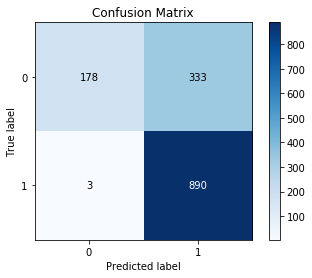

In [267]:
#using scikit-plot python package

from scikitplot import plotters as skplt

skplt.plot_confusion_matrix(y_true=np.array(y_test), y_pred=predicted)
plt.show()

### The model did not misclassify many off topic tweets as on topic, but classified many on topic tweets as off-topic (333). This may be because of the non-specific keywords that were used to create the on and off-topic datasets. If more specific keywords were used to separate on and off topic tweets, the model may be better at classifying the tweets.

## Test the Classification Model

In [156]:
df_test = pd.read_csv("data/tweetdata.csv")
df_test.head(1)

,id,created at,text,screen name,followers_count,friends_count,name,lat,lon,place name,place type
0,1124315228307697665,Fri May 03 14:10:13 +0000 2019,@maddielynnn_ @Applebees,Codyhoffman2014,260,272,CODY HOFFMAN,NaN,NaN,NaN,NaN


In [157]:
df_test = df_test['text']

In [158]:
df_test.to_csv('data/test.csv',index = False, header = None)

C:\Users\ajeda\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [159]:
docs_new = []
openfile = open('data/test.csv', 'r',encoding = 'ISO-8859-1')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    docs_new.append(i)    
openfile.close()
print(len(docs_new))

1719


In [160]:
docs_new = np.array(docs_new).ravel()

In [269]:
print(docs_new[:15])

['@maddielynnn_ @Applebees'
 '@Applebees a good old glass of https://t.co/u5bLWA7FIk'
 'Hey, @applebees! Iâ\x80\x99d stop by for your #NeighborhoodDrink, but where are the #plantbased entrÃ©es? When can we look fâ\x80¦ https://t.co/qEP5efM3CH'
 'RT @Loki_Lady: Hey, @applebees! Iâ\x80\x99d stop by for your #NeighborhoodDrink, if you had #plantbased entrÃ©es. When can we look forward to a chanâ\x80¦'
 'Today marks 2 years since an old man ran his car into the side of Applebees in Kennett'
 'RT @mynefeli: Hey, @applebees! Iâ\x80\x99d stop by for your #NeighborhoodDrink, but where are the #plantbased entrÃ©es? When can we look forward toâ\x80¦'
 '@Applebees Straight fucking water'
 'RT @CallMeCarsonYT: @Applebees https://t.co/FE1XpvZ19Z'
 'RT @CallMeCarsonYT: @Applebees https://t.co/FE1XpvZ19Z'
 '@Applebees @air7823'
 "RT @RocRedWings: Some argue this is the greatest logo in Red Wings history. ð\x9f\x94¥\n\nWe put it on a shirt and we're giving it away to the first 5â\x80¦"
 'i deserve app

In [270]:

unlabeled_tfidf = tfidf_vectorizer.transform(docs_new[:15])

predicted = nb.predict(unlabeled_tfidf)

for doc, category in zip(docs_new, predicted):
    print(('%r => %s' % (doc, category)))

'@maddielynnn_ @Applebees' => 1
'@Applebees a good old glass of https://t.co/u5bLWA7FIk' => 1
'Hey, @applebees! Iâ\x80\x99d stop by for your #NeighborhoodDrink, but where are the #plantbased entrÃ©es? When can we look fâ\x80¦ https://t.co/qEP5efM3CH' => 1
'RT @Loki_Lady: Hey, @applebees! Iâ\x80\x99d stop by for your #NeighborhoodDrink, if you had #plantbased entrÃ©es. When can we look forward to a chanâ\x80¦' => 1
'Today marks 2 years since an old man ran his car into the side of Applebees in Kennett' => 1
'RT @mynefeli: Hey, @applebees! Iâ\x80\x99d stop by for your #NeighborhoodDrink, but where are the #plantbased entrÃ©es? When can we look forward toâ\x80¦' => 1
'@Applebees Straight fucking water' => 1
'RT @CallMeCarsonYT: @Applebees https://t.co/FE1XpvZ19Z' => 1
'RT @CallMeCarsonYT: @Applebees https://t.co/FE1XpvZ19Z' => 1
'@Applebees @air7823' => 1
"RT @RocRedWings: Some argue this is the greatest logo in Red Wings history. ð\x9f\x94¥\n\nWe put it on a shirt and we're giving it awa

In [271]:
predicted_prob = nb.predict_proba(unlabeled_tfidf[:15])

for doc, category in zip(docs_new, predicted_prob):
    print(('%r => %s' % (doc, category)))

'@maddielynnn_ @Applebees' => [0.22235292 0.77764708]
'@Applebees a good old glass of https://t.co/u5bLWA7FIk' => [0.1089516 0.8910484]
'Hey, @applebees! Iâ\x80\x99d stop by for your #NeighborhoodDrink, but where are the #plantbased entrÃ©es? When can we look fâ\x80¦ https://t.co/qEP5efM3CH' => [0.09913003 0.90086997]
'RT @Loki_Lady: Hey, @applebees! Iâ\x80\x99d stop by for your #NeighborhoodDrink, if you had #plantbased entrÃ©es. When can we look forward to a chanâ\x80¦' => [0.09832703 0.90167297]
'Today marks 2 years since an old man ran his car into the side of Applebees in Kennett' => [0.31099003 0.68900997]
'RT @mynefeli: Hey, @applebees! Iâ\x80\x99d stop by for your #NeighborhoodDrink, but where are the #plantbased entrÃ©es? When can we look forward toâ\x80¦' => [0.10862811 0.89137189]
'@Applebees Straight fucking water' => [0.24158687 0.75841313]
'RT @CallMeCarsonYT: @Applebees https://t.co/FE1XpvZ19Z' => [0.3548665 0.6451335]
'RT @CallMeCarsonYT: @Applebees https://t.co/FE1XpvZ

### Some of these tweets appear to be off-topic, even though they were all classified as on topic. This is likely not a classification error, but instead an error with the type and amount of keywords that were initially used to separate tweets into on and off-topic.

# Mentions Network Analysis

In [164]:
df1 = df[['screen_name','mentions']]
df1['mentions'].replace('', np.nan, inplace=True)
df1 = df1.dropna(subset=['mentions'])
df1 = df1.reset_index().drop(columns = ['created_at'])
df1.head()

C:\Users\ajeda\Anaconda2\envs\py36\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,screen_name,mentions
0,geo1de,brycetreggs
1,SoonerStanMcC,"_somecallme_tim, soonerstanmcc, travissooner23"
2,MrsKodiBerger,applebees
3,EnusNWenis,"thenerdcity, crimson_films, boogie2988, shorenice, phillyd, katimorton, antoniochavezsn, mcdonalds, bugerking75, burgerking, inandoutburger, applebees"
4,matthewmed,"applebees, cah"


In [165]:
df1.to_csv("data/mentions.csv",index=False,header=False)

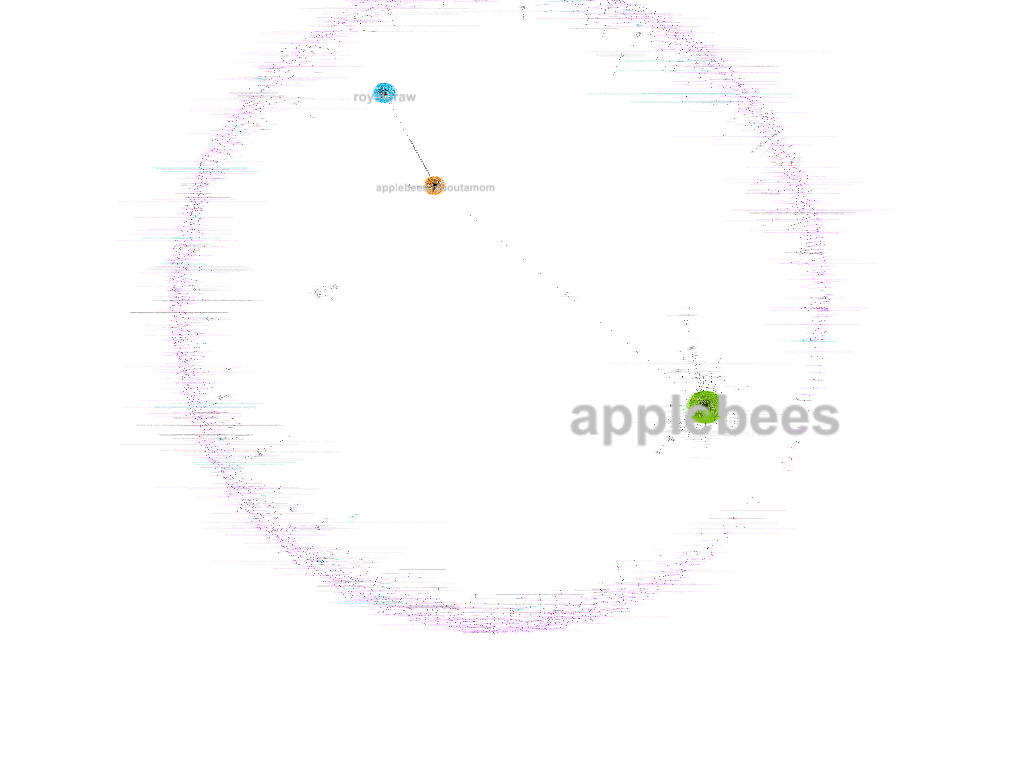

In [166]:
from IPython.display import Image
Image("data/mentions.png")

### Applebee's mention network contains three main clusters, surrounded by very small individual clusters linked by 1-2 edges.
* The Applebee's cluster is conected to the second largest cluster, the about a mom cluster, with a few blog nodes.
* The About a Mom blog is also connected to the Gay NYC Dad Blog cluster
* Two small nodes called "collifornia and aztwtrrtwit connect The About a Mom Cluster to the Royal Draw Give Away cluster

### Most of the largest clusters in the mentions network are linked to blog promotions or promotional giveaways
* Applebees is also linked to mentions to the Fox News boycott and competitors

### The network is not very dense and not very connected. Clusters that are connected are only connected by a few edges and nodes.
* The Average degree of this network is 1.386
* The Average Weighted Degree is 1.731
* The Network Diameter is 12
* The graph density is so low it reads as 0
* The modularity is .897
* The Average Clustering Coefficient is .003
* The average path length is 4.313

# Hashtags Network Analysis

In [167]:
#select only a few columns for our hashtag analysis
df2 = df[["screen_name","hashtags"]]
df2.head()

,screen_name,hashtags
created_at,,
2018-11-23 14:11:39,geo1de,gobblegobble
2018-11-23 15:53:55,SoonerStanMcC,sooners
2018-11-23 17:08:20,MrsKodiBerger,thisiswhyimarriedyou
2018-11-23 17:38:22,EnusNWenis,ff thanksgiving2018
2018-11-23 18:04:18,matthewmed,blackfriday 99percentoffsale


In [168]:
df2 = df2[["screen_name","hashtags"]]
df2['hashtags'].replace('', np.nan, inplace=True)
df2 = df2.dropna(subset=['hashtags'])
df2 = df2.reset_index().drop(columns = ['created_at'])
df2.head()

,screen_name,hashtags
0,geo1de,gobblegobble
1,SoonerStanMcC,sooners
2,MrsKodiBerger,thisiswhyimarriedyou
3,EnusNWenis,ff thanksgiving2018
4,matthewmed,blackfriday 99percentoffsale


In [169]:
df2.to_csv("data/hashtags.csv",index=False,header=False)

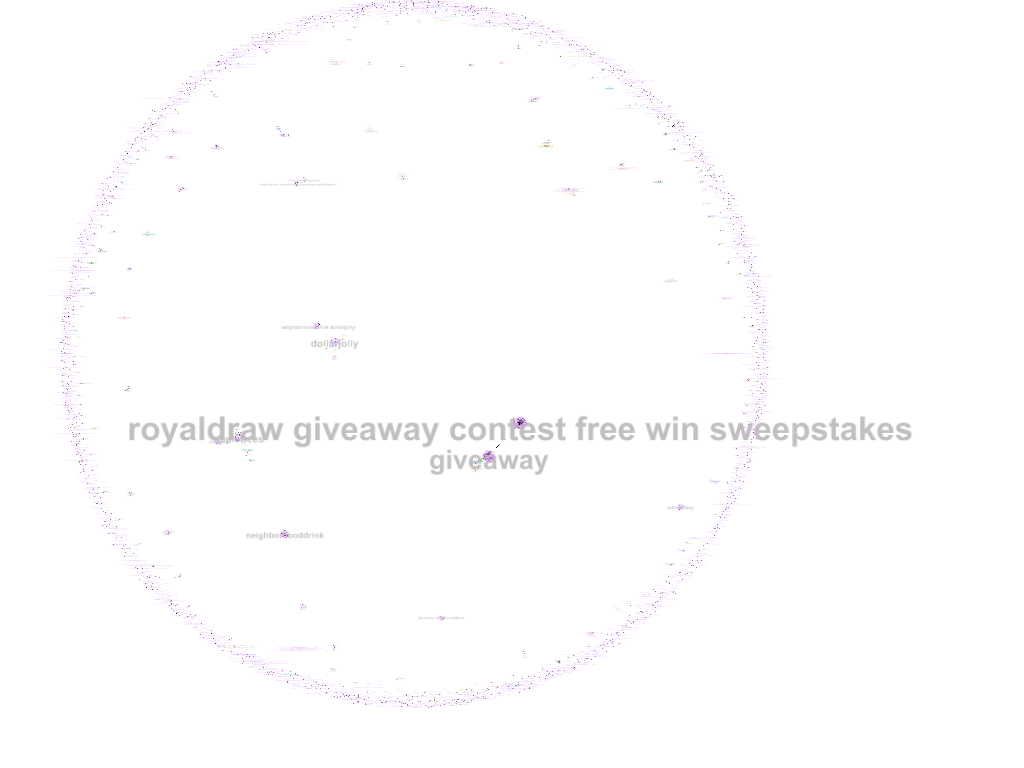

In [170]:
from IPython.display import Image
Image("data/hashtags.png")

### Applebee's hashtag network has two big clusters, surrounded by a few small clusters, with outer unconnected clusters located on the edge of the network.
* The largest cluster is the royaldraw hashtag, which is also connected to the giveaway hashtag. These hashtags are connected to smaller hashtags in a such as sweepstakes, millionmealsforheros, and nationalpastaday.
* Most of the other clusters have very small clusters and are not connected to each other. Even hashtags that are repetitive and repeat the same words are not connected to eachother.
* Other popular hashtags refer to popular promotions: neighborhood drink, dollar jolly, wingtoberfest, and dollar zombie
* Applebees has a very small cluster. This cluster is only connected to a very small number of hashtags. The largest node of these hashtags are boycottapplebees and neveragain, which are both very negative.
* Veterans day is also a moderately sized node.

### The network is not very dense and not very connected. Clusters that are connected are only connected by a few edges and nodes.
* The Average degree of this network is 1.259
* The Average Weighted Degree is 1.556
* The Network Diameter is 8
* The graph density is 0
* The modularity is .97
* The Average Clustering Coefficient is 0
* The average path length is 3.025

# Summary

## Hashtags and Mentions

* Popular hashtags are mostly about giftcards, giveaways, and promotional items such as the dollar jolly drink and neighborhood drink promotions in general
* Popular mentions include references to promotions run on blogs aboutamom and gaynycdad
* Consumers also mentioned a boycott of fox news sponsors that included Applebee's

## Sentiment

* 10/26 and 11/05 had the highest daily sentiment scores of the period.
* 12/25 and 11/15 had the lowest sentiment of the period.
* All tweets included a lot of phrases discussed in the hashtags and mentions section, including the royal draw account, aboutamom giveaway, and the neighborhood pasta campaign.
* Positive Tweets was almost identical to the word cloud for all tweets. This is because most of the tweets are positive tweets.
* Neutral tweets have many terms that are on topic to applebee's, including grill, food, drink, doller jolly, lunch, and order.
* Negative tweets mostly refer to the fox news boycott, as well as chicken meet and customer service issues

### On Topic Tweets
* Even when tweets were filtered by on-topic keywords foxnews tweets remained. 
* There were also a lot of tweets about budweiser's dilly dilly campagin which also doesn't seem to be on-topic on the surface. There are a lot of mentions abotu consumer products, deails, and black friday as well.
* The word cloud of on topic tweets mostly center around gift cards, deals, and promotions.
* Popular bigrams in off-topic tweets do not include fox-news boycott terms. Instead they include terms about black-friday, and many other topics that are difficult to categorize or tie to applebee's

### Off Topic Tweets
* Off topic tweets do not include fox-news boycott terms. Instead they include terms about black-friday, and many other topics that are difficult to categorize or tie to applebee's.

### On-topic tweets have a higher average than off-topic tweets (.35 vs .30) both categories can be classified as positive.


## Topic-Modeling

### All tweets include the following general topics:
* The biggest topic is about the aboutamom giveaway, followed by the fox news boycott, the third topic is about general applebee's topics, the forth largest topic discusses veterans day and other fundraisers
* There is a topic that uses language about Applebee's promotions
* There is a whole topic that focuses mainly on Applebee's Dollar Jolly drink promotion, that was ran mid-November through December.
### High Sentiment Day Topics: 
* On October 28th and 11/05 both had number one topics that were focused on the aboutamom blog giveaway

### Low Sentiment Day Topics
* The biggest topic and complaint on Christmas was poor service on Christmas Eve.
* 11/18 The most Coherent and Largest Topic on this Day was regarding the Fox News Sponsorship. This could have also just been a generally low sentiment day on twitter that was not due to any on-topic Applebee's reasons.

## Network Analysis

Applebee's mention network contains three main clusters, surrounded by very small individual clusters linked by 1-2 edges. The Applebee's cluster is the largest cluster, and is conected to the second largest cluster, the about a mom cluster, with a few blog nodes. The About a Mom blog is also connected to the Gay NYC Dad Blog cluster. Two small nodes called "collifornia and aztwtrrtwit connect The About a Mom Cluster to the Royal Draw Give Away cluster. Most of the large clusters in the mention network are related to giveaways, promotions, and blogs.

Applebee's hashtag network has two big clusters, surrounded by a few small clsuters, with outer unconnected clusters located on the edge of the network. The largest cluster is the royaldraw hashtag, which is also connected to the giveaway hashtag. These hashtags are connected to smaller hashtags in a such as sweepstakes, millionmealsforheros, and nationalpastaday.Most of the other clusters have very small clusters and are not connected to each other. Even hashtags that are repetitive and repeat the same words are not connected to eachother. Other popular hashtags refer to popular promotions: neighborhood drink, dollar jolly, wingtoberfest, and dollar zombie Applebees has a very small cluster. This cluster is only connected to a very small number of hashtags. The largest node of these hashtags are boycottapplebees and neveragain, which are both very negative. Veterans day is also a moderately sized node.




# Recommendations

* Applebee's should continue to partner with blogs to sponsor giveaways and promotions
* Applebee's should increase the number of hashtags it uses on its account that mentions #Applbees and its promotional items
* Applebee's can use topic modeling to determine what promotional and ad campaigns are sucessfully contributing to peaks in sentiment in the future
* Applebee's can also use topic modeling to determine if periods of low sentiment are due to off-topic issues, or due to customer service related issues.